# Linear Algebra and Linear Regression

### 13th October 2015 Neil Lawrence


## Sum of Squares Error

Last week we considered a cost function for minimization of the error. We considered items (films) and users and assumed that each movie rating, $y_{i,j}$ could be summarised by an inner product between a vector associated with the item, $\mathbf{v}_j$ and one associated with the user $
\mathbf{u}_i$. We justified the inner product as a measure of similarity in the space of 'movie subjects', where both the users and the items lived, giving the analogy of a library.

To make predictions we encouraged the similarity to be high if the movie rating was high using the quadratic error function,
$$
E_{i,j}(\mathbf{u}_i, \mathbf{v}_j) = \left(\mathbf{u}_i^\top \mathbf{v}_j - y_{i,j}\right)^2,
$$
which we then summed across all the observations to form the total error
$$
E(\mathbf{U}, \mathbf{V}) = \sum_{i,j}s_{i,j}\left(\mathbf{u}_i^\top \mathbf{v}_j - y_{i,j}\right)^2,
$$
where $s_{i,j}$ is an indicator variable which is set to 1 if the rating of movie $j$ by user $i$ is provided in our data set. 

This is known as a sum of squares error. Minimizing it was first proposed by [Legendre](http://en.wikipedia.org/wiki/Adrien-Marie_Legendre) in 1805. His book, which was on the orbit of comets, is available on google books, we can take a look at the relevant page by calling the code below. 

In [3]:
import pods
pods.notebook.display_google_book(id='spcAAAAAMAAJ', page=72) 

Of course, the main text is in French, but the key part we are interested in can be roughly translated as

"In most matters where we take measures data through observation, the most accurate results they can offer, it is almost always leads to a system of equations of the form
$$E = a + bx + cy + fz + etc .$$
where a, b, c, f etc are the known coefficients and  x , y, z etc are unknown and must be determined by the condition that the value of E is reduced, for each equation, to an amount or zero or very small."

He continues

"Of all the principles that we can offer for this item, I think it is not broader, more accurate, nor easier than the one we have used in previous research application, and that is to make the minimum sum of the squares of the errors. By this means, it is between the errors a kind of balance that prevents extreme to prevail, is very specific to make known the state of the closest to the truth system. The sum of the squares of the errors $E^2 + \left.E^\prime\right.^2 + \left.E^{\prime\prime}\right.^2 + etc$ being
\begin{align*}   &(a + bx + cy + fz + etc)^2 \\
+ &(a^\prime + b^\prime x + c^\prime y + f^\prime z + etc ) ^2\\
+ &(a^{\prime\prime} + b^{\prime\prime}x  + c^{\prime\prime}y +  f^{\prime\prime}z + etc )^2 \\
+ & etc
\end{align*}
if we wanted a minimum, by varying x alone, we will have the equation ..."

This is the earliest know printed version of the problem of least squares. The notation, however, is a little awkward for mordern eyes. In particular Legendre doesn't make use of the sum sign,
$$
\sum_{i=1}^3 z_i = z_1 + z_2 + z_3
$$
nor does he make use of the inner product. 

In our notation, if we were to do linear regression, we would need to subsititue:
\begin{align*}
a &\leftarrow y_1-c, \\ a^\prime &\leftarrow y_2-c,\\ a^{\prime\prime} &\leftarrow y_3 -c,\\ 
\text{etc.} 
\end{align*}
to introduce the data observations $\{y_i\}_{i=1}^{n}$ alongside $c$, the offset. We would then introduce the input locations
\begin{align*}
b & \leftarrow x_1,\\
b^\prime & \leftarrow x_2,\\
b^{\prime\prime} & \leftarrow x_3\\
\text{etc.}
\end{align*}
and finally the gradient of the function
$$x \leftarrow -m.$$
The remaining coefficients ($c$ and $f$) would then be zero. That would give us 
\begin{align*}   &(y_1 - (mx_1+c))^2 \\
+ &(y_2 -(mx_2 + c))^2\\
+ &(y_3 -(mx_3 + c))^2 \\
+ & \text{etc.}
\end{align*}
which we would write in the modern notation for sums as
$$
\sum_{i=1}^n (y_i-(mx_i + c))^2
$$
which is recognised as the sum of squares error for a linear regression.

This shows the advantage of modern [summation operator](http://en.wikipedia.org/wiki/Summation), $\sum$,  in keeping our mathematical notation compact. Whilst it may look more complicated the first time you see it, understanding the mathematical rules that go around it, allows us to go much further with the notation.

Inner products (or [dot products](http://en.wikipedia.org/wiki/Dot_product)) are similar. They allow us to write
$$
\sum_{i=1}^q u_i v_i
$$
in a more compact notation,
$
\mathbf{u}\cdot\mathbf{v}.
$

Here we are using bold face to represent vectors, and we assume that the individual elements of a vector $\mathbf{z}$ are given as a series of scalars
$$
\mathbf{z} = \begin{bmatrix} z_1\\ z_2\\ \vdots\\ z_n \end{bmatrix}
$$
which are each indexed by their position in the vector.

## Linear Algebra

Linear algebra provides a very similar role, when we introduce [linear algebra](http://en.wikipedia.org/wiki/Linear_algebra), it is because we are faced with a large number of addition and multiplication operations. These operations need to be done together and would be very tedious to write down as a group. So the first reason we reach for linear algebra is for a more compact representation of our mathematical formulae. 

### Running Example: Olympic Marathons

Now we will load in the Olympic marathon data. This is data of the olympic marath times for the men's marathon from the first olympics in 1896 up until the London 2012 olympics.

In [4]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

You can see what these values are by typing:

In [5]:
print(x)
print(y)

[[1896.]
 [1900.]
 [1904.]
 [1908.]
 [1912.]
 [1920.]
 [1924.]
 [1928.]
 [1932.]
 [1936.]
 [1948.]
 [1952.]
 [1956.]
 [1960.]
 [1964.]
 [1968.]
 [1972.]
 [1976.]
 [1980.]
 [1984.]
 [1988.]
 [1992.]
 [1996.]
 [2000.]
 [2004.]
 [2008.]
 [2012.]]
[[4.47083333]
 [4.46472926]
 [5.22208333]
 [4.15467867]
 [3.90331675]
 [3.56951267]
 [3.82454477]
 [3.62483707]
 [3.59284275]
 [3.53880792]
 [3.67010309]
 [3.39029111]
 [3.43642612]
 [3.20583008]
 [3.13275665]
 [3.32819844]
 [3.13583758]
 [3.0789588 ]
 [3.10581823]
 [3.06552909]
 [3.09357349]
 [3.16111704]
 [3.14255243]
 [3.08527867]
 [3.10265829]
 [2.99877553]
 [3.03392977]]


Note that they are not `pandas` data frames for this example, they are just arrays of dimensionality $n\times 1$, where $n$ is the number of data.

The aim of this lab is to have you coding linear regression in python. We will do it in two ways, once using iterative updates (coordinate ascent) and then using linear algebra. The linear algebra approach will not only work much better, it is easy to extend to multiple input linear regression and *non-linear* regression using basis functions.

### Plotting the Data

You can make a plot of $y$ vs $x$ with the following command:

Text(0,0.5,'pace in min/km')

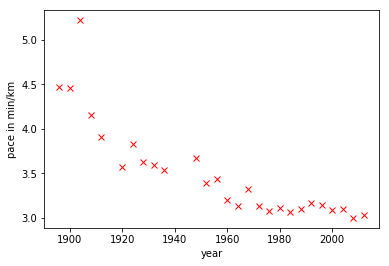

In [6]:
%matplotlib inline 
import pylab as plt

plt.plot(x, y, 'rx')
plt.xlabel('year')
plt.ylabel('pace in min/km')

### Maximum Likelihood: Iterative Solution

Now we will take the maximum likelihood approach we derived in the lecture to fit a line, $y_i=mx_i + c$, to the data you've plotted. We are trying to minimize the error function:

$$E(m, c) =  \sum_{i=1}^n(y_i-mx_i-c)^2$$

with respect to $m$, $c$ and $\sigma^2$. We can start with an initial guess for $m$, 

In [7]:
m = -0.4
c = 80 

Then we use the maximum likelihood update to find an estimate for the offset, $c$.

### Coordinate Descent

In the movie recommender system example, we minimised the objective function by steepest descent based gradient methods. Our updates required us to compute the gradient at the position we were located, then to update the gradient according to the direction of steepest descent. This time, we will take another approach. It is known as *coordinate descent*. In coordinate descent, we choose to move one parameter at a time. Ideally, we design an algorithm that at each step moves the parameter to its minimum value. At each step we choose to move the individual parameter to its minimum.

To find the minimum, we look for the point in the curve where the gradient is zero. This can be found by taking the gradient of $E(m,c)$ with respect to the parameter. 

#### Update for Offset

Let's consider the parameter $c$ first. The gradient goes nicely through the summation operator, and we obtain
$$
\frac{\text{d}E(m,c)}{\text{d}c} = -\sum_{i=1}^n 2(y_i-mx_i-c).
$$
Now we want the point that is a minimum. A minimum is an example of a [*stationary point*](http://en.wikipedia.org/wiki/Stationary_point), the stationary points are those points of the function where the gradient is zero. They are found by solving the equation for $\frac{\text{d}E(m,c)}{\text{d}c} = 0$. Substituting in to our gradient, we can obtain the following equation, 
$$
0 = -\sum_{i=1}^n 2(y_i-mx_i-c)
$$
which can be reorganised as follows,
$$
c^* = \frac{\sum_{i=1}^n(y_i-m^*x_i)}{n}.
$$
The fact that the stationary point is easily extracted in this manner implies that the solution is *unique*. There is only one stationary point for this system. Traditionally when trying to determine the type of stationary point we have encountered we now compute the *second derivative*,
$$
\frac{\text{d}^2E(m,c)}{\text{d}c^2} = 2n.
$$
The second derivative is positive, which in turn implies that we have found a minimum of the function. This means that setting $c$ in this way will take us to the lowest point along that axes.

In [8]:
# set c to the minimum
c = (y - m*x).mean()
print(c)

786.0197711454076


#### Update for Slope

Now we have the offset set to the minimum value, in coordinate descent, the next step is to optimise another parameter. Only one further parameter remains. That is the slope of the system. 

Now we can turn our attention to the slope. We once again peform the same set of computations to find the minima. We end up with an update equation of the following form.

$$m^* = \frac{\sum_{i=1}^n (y_i - c)x_i}{\sum_{i=1}^n x_i^2}$$

Communication of mathematics in data science is an essential skill, in a moment, you will be asked to rederive the equation above. Before we do that, however, we will briefly review how to write mathematics in the notebook.

### $\LaTeX$ for Maths

These cells use [Markdown format](http://en.wikipedia.org/wiki/Markdown). You can include maths in your markdown using [$\LaTeX$ syntax](http://en.wikipedia.org/wiki/LaTeX), all you have to do is write your answer inside dollar signs, as follows:

To write a fraction, we write `$\frac{a}{b}$`, and it will display like this $\frac{a}{b}$. To write a subscript we write `$a_b$` which will appear as $a_b$. To write a superscript (for example in a polynomial) we write `$a^b$` which will appear as $a^b$. There are lots of other macros as well, for example we can do greek letters such as `$\alpha, \beta, \gamma$` rendering as $\alpha, \beta, \gamma$. And we can do sum and intergral signs as `$\sum \int \int$`.

You can combine many of these operations together for composing expressions.

### Assignment Question 1 

Convert the following python code expressions into $\LaTeX$j, writing your answers below. In each case write your answer as a single equality (i.e. your maths should only contain one expression, not several lines of expressions). For the purposes of your $\LaTeX$ please assume that `x` and `w` are $n$ dimensional vectors. 

(a) 
``` python
f = x.sum()
```

(b) 
``` python 
m = x.mean()
```

(c) 
``` python
g = (x*w).sum()
```

*15 marks*

#### Question 1 Answer

(a)$${f} = \sum_{i=1}^n x_i$$

(b)$$m^* = \frac{\sum_{i=1}^n x_i}{n}$$

(c)$${g} = \sum_{i=1}^n x_iw_i$$

### Gradient With Respect to the Slope
Now that you've had a little training in writing maths with $\LaTeX$, we will be able to use it to answer questions. The next thing we are going to do is a little differentiation practice. 

### Assignment Question 2

Derive the the gradient of the objective function with respect to the slope, $m$. Rearrange it to show that the update equation written above does find the stationary points of the objective function. By computing its derivative show that it's a minimum.

*20 marks*

#### Question 2 Answer

$$
E(m, c) =  \sum_{i=1}^n(y_i-mx_i-c)^2
$$
$$
\frac{\text{d}E(m,c)}{\text{d}m} = -\sum_{i=1}^n 2(y_i-mx_i-c)x_i
$$
$$
0 = -\sum_{i=1}^n 2(y_i-mx_i-c)x_i
$$
$$
\sum_{i=1}^n (y_ix_i-m{x_i}^2-cx_i) = 0
$$
$$
\sum_{i=1}^n m{x_i}^2 = \sum_{i=1}^n (y_i-c)x_i
$$
$$m^* = \frac{\sum_{i=1}^n (y_i - c)x_i}{\sum_{i=1}^n x_i^2}$$

We have,

$$
\frac{\text{d}E(m,c)}{\text{d}m} = -\sum_{i=1}^n 2(y_ix_i-mx_i^2-cx_i)
$$
$$
\frac{\text{d}^2E(m,c)}{\text{d}m^2} = -\sum_{i=1}^n 2(0-x_i^2-0)
$$
$$\frac{\text{d}^2E(m,c)}{\text{d}m^2} = \sum_{i=1}^n 2x_i^2$$

The second derivative is positive, which in turn implies that we have found a minimum of the function. This means that setting $m$ in this way will take us to the lowest point along that axis.

In [9]:
m = ((y - c)*x).sum()/(x**2).sum()
print(m)

-0.3998724072997093


We can have a look at how good our fit is by computing the prediction across the input space. First create a vector of 'test points',

In [10]:
import numpy as np
x_test = np.linspace(1890, 2020, 130)[:, None]
print(x_test)

[[1890.        ]
 [1891.00775194]
 [1892.01550388]
 [1893.02325581]
 [1894.03100775]
 [1895.03875969]
 [1896.04651163]
 [1897.05426357]
 [1898.0620155 ]
 [1899.06976744]
 [1900.07751938]
 [1901.08527132]
 [1902.09302326]
 [1903.10077519]
 [1904.10852713]
 [1905.11627907]
 [1906.12403101]
 [1907.13178295]
 [1908.13953488]
 [1909.14728682]
 [1910.15503876]
 [1911.1627907 ]
 [1912.17054264]
 [1913.17829457]
 [1914.18604651]
 [1915.19379845]
 [1916.20155039]
 [1917.20930233]
 [1918.21705426]
 [1919.2248062 ]
 [1920.23255814]
 [1921.24031008]
 [1922.24806202]
 [1923.25581395]
 [1924.26356589]
 [1925.27131783]
 [1926.27906977]
 [1927.28682171]
 [1928.29457364]
 [1929.30232558]
 [1930.31007752]
 [1931.31782946]
 [1932.3255814 ]
 [1933.33333333]
 [1934.34108527]
 [1935.34883721]
 [1936.35658915]
 [1937.36434109]
 [1938.37209302]
 [1939.37984496]
 [1940.3875969 ]
 [1941.39534884]
 [1942.40310078]
 [1943.41085271]
 [1944.41860465]
 [1945.42635659]
 [1946.43410853]
 [1947.44186047]
 [1948.4496124

Now use this vector to compute some test predictions,

In [11]:
f_test = m*x_test + c
print(f_test)

[[ 30.26092135]
 [ 29.85794916]
 [ 29.45497696]
 [ 29.05200477]
 [ 28.64903258]
 [ 28.24606038]
 [ 27.84308819]
 [ 27.440116  ]
 [ 27.0371438 ]
 [ 26.63417161]
 [ 26.23119941]
 [ 25.82822722]
 [ 25.42525503]
 [ 25.02228283]
 [ 24.61931064]
 [ 24.21633845]
 [ 23.81336625]
 [ 23.41039406]
 [ 23.00742187]
 [ 22.60444967]
 [ 22.20147748]
 [ 21.79850529]
 [ 21.39553309]
 [ 20.9925609 ]
 [ 20.58958871]
 [ 20.18661651]
 [ 19.78364432]
 [ 19.38067213]
 [ 18.97769993]
 [ 18.57472774]
 [ 18.17175555]
 [ 17.76878335]
 [ 17.36581116]
 [ 16.96283897]
 [ 16.55986677]
 [ 16.15689458]
 [ 15.75392239]
 [ 15.35095019]
 [ 14.947978  ]
 [ 14.54500581]
 [ 14.14203361]
 [ 13.73906142]
 [ 13.33608923]
 [ 12.93311703]
 [ 12.53014484]
 [ 12.12717265]
 [ 11.72420045]
 [ 11.32122826]
 [ 10.91825607]
 [ 10.51528387]
 [ 10.11231168]
 [  9.70933949]
 [  9.30636729]
 [  8.9033951 ]
 [  8.50042291]
 [  8.09745071]
 [  7.69447852]
 [  7.29150632]
 [  6.88853413]
 [  6.48556194]
 [  6.08258974]
 [  5.67961755]
 [  5.27

Now plot those test predictions with a blue line on the same plot as the data,

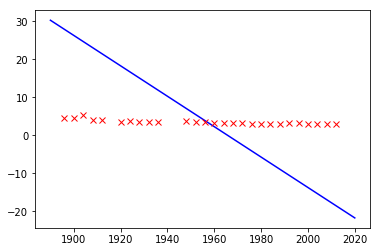

In [12]:
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

The fit isn't very good, we need to iterate between these parameter updates in a loop to improve the fit, we have to do this several times,

In [13]:
for i in np.arange(10):
    m = ((y - c)*x).sum()/(x*x).sum()
    c = (y-m*x).sum()/y.shape[0]
print(m)
print(c)

-0.3987259642505404
783.5273797273904


And let's try plotting the result again

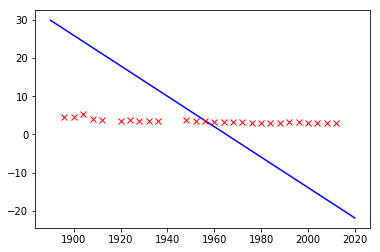

In [14]:
f_test = m*x_test + c
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Clearly we need more iterations than 10! In the next question you will add more iterations and report on the error as optimisation proceeds. 

### Assignment Question 3

There is a problem here, we seem to need many interations to get to a good solution. Let's explore what's going on. Write code which alternates between updates of `c` and `m`. Include the following features in your code.

(a) Initialise with `m=-0.4` and `c=80`.
(b) Every 10 iterations compute the value of the objective function for the training data and print it to the screen (you'll find hints on this in the lab from last week.
(c) Cause the code to stop running when the error change over less than 10 iterations is smaller than $1\times10^{-4}$. This is known as a stopping criterion.

Why do we need so many iterations to get to the solution?

*25 marks*

In [22]:
# Question 3 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.

x_test = np.linspace(1890, 2020, 130)[:, None]
m = -0.4 # Initialising m
c = 80 # Initialising c
obj = 0 # Initialising objective function
objold = 0 # Initialising another ojective function so that we can take see the change in error
objdiff = 0 # Initialising a variable to store the change in error

# Now we could take m and j in the same loop but since we need to alternate between the
# updates of m and c, two separate loops are needed

for i in np.arange(50000): # Taking iteration as 50000
    for j in np.arange(10):
        m = ((y - c)*x).sum()/(x*x).sum()
    obj = (np.square(y-m*x-c)).sum()
    objdiff = abs(objold - obj) # Taking the absolute value of the error change
    objold = obj  # Assigning the value of the current objective function to be used later 
    if(objdiff < 0.0001):
        break # to stop the code from running any further
    print("Iteration", i, "Objective function: ", obj, "Error Change: ", objdiff)
    for j in np.arange(10):
        c = (y-m*x).sum()/y.shape[0]
    obj = (np.square(y-m*x-c)).sum()
    objdiff = abs(objold - obj)
    objold = obj        
    if(objdiff < 0.0001):
        break 
    print("Iteration", i, "Objective function: ", obj, "Error Change: ", objdiff)
              
print(m)
print(c)

Iteration 0 Objective function:  25.227658455563223 Error Change:  25.227658455563223
Iteration 0 Objective function:  25.219994152546796 Error Change:  0.007664303016426288
Iteration 1 Objective function:  25.21233237630095 Error Change:  0.007661776245846852
Iteration 1 Objective function:  25.204673125992663 Error Change:  0.007659250308286403
Iteration 2 Objective function:  25.197016400789085 Error Change:  0.007656725203577963
Iteration 2 Objective function:  25.189362199857953 Error Change:  0.007654200931131783
Iteration 3 Objective function:  25.181710522367016 Error Change:  0.007651677490937203
Iteration 3 Objective function:  25.17406136748421 Error Change:  0.007649154882805931
Iteration 4 Objective function:  25.166414734377945 Error Change:  0.007646633106265455
Iteration 4 Objective function:  25.15877062221686 Error Change:  0.007644112161084848
Iteration 5 Objective function:  25.151129030169873 Error Change:  0.007641592046987
Iteration 5 Objective function:  25.1434

Iteration 83 Objective function:  23.989372914016013 Error Change:  0.007258457497659521
Iteration 83 Objective function:  23.982116849489596 Error Change:  0.007256064526416139
Iteration 84 Objective function:  23.974863177145544 Error Change:  0.007253672344052831
Iteration 84 Objective function:  23.9676118961952 Error Change:  0.00725128095034222
Iteration 85 Objective function:  23.960363005850127 Error Change:  0.007248890345074699
Iteration 85 Objective function:  23.953116505322267 Error Change:  0.007246500527859467
Iteration 86 Objective function:  23.945872393823723 Error Change:  0.007244111498543759
Iteration 86 Objective function:  23.93863067056682 Error Change:  0.007241723256903754
Iteration 87 Objective function:  23.931391334764225 Error Change:  0.007239335802594837
Iteration 87 Objective function:  23.92415438562885 Error Change:  0.007236949135375426
Iteration 88 Objective function:  23.916919822373906 Error Change:  0.007234563254943538
Iteration 88 Objective fun

Iteration 143 Objective function:  23.128531425086152 Error Change:  0.006974561324195605
Iteration 144 Objective function:  23.121559163138183 Error Change:  0.006972261947968406
Iteration 144 Objective function:  23.114589199808485 Error Change:  0.006969963329698459
Iteration 145 Objective function:  23.1076215343392 Error Change:  0.006967665469286288
Iteration 145 Objective function:  23.10065616597273 Error Change:  0.006965368366468994
Iteration 146 Objective function:  23.093693093951842 Error Change:  0.006963072020887751
Iteration 146 Objective function:  23.086732317519356 Error Change:  0.006960776432485716
Iteration 147 Objective function:  23.079773835918523 Error Change:  0.006958481600833011
Iteration 147 Objective function:  23.07281764839278 Error Change:  0.006956187525744895
Iteration 148 Objective function:  23.065863754185777 Error Change:  0.006953894207001099
Iteration 148 Objective function:  23.058912152541538 Error Change:  0.006951601644239247
Iteration 149 

Iteration 208 Objective function:  22.247824896304355 Error Change:  0.006684113876332276
Iteration 208 Objective function:  22.24114298604949 Error Change:  0.006681910254865642
Iteration 209 Objective function:  22.234463278689546 Error Change:  0.0066797073599431656
Iteration 209 Objective function:  22.227785773498304 Error Change:  0.006677505191241551
Iteration 210 Objective function:  22.221110469749785 Error Change:  0.006675303748519212
Iteration 210 Objective function:  22.214437366718126 Error Change:  0.006673103031658911
Iteration 211 Objective function:  22.207766463677867 Error Change:  0.006670903040259191
Iteration 211 Objective function:  22.201097759903664 Error Change:  0.006668703774202811
Iteration 212 Objective function:  22.194431254670448 Error Change:  0.006666505233216213
Iteration 212 Objective function:  22.18776694725347 Error Change:  0.0066643074169796535
Iteration 213 Objective function:  22.181104836928114 Error Change:  0.0066621103253545755
Iteration

Iteration 291 Objective function:  21.168259952072578 Error Change:  0.006328085082781598
Iteration 291 Objective function:  21.16193395323552 Error Change:  0.006325998837059643
Iteration 292 Objective function:  21.155610039956386 Error Change:  0.006323913279132398
Iteration 292 Objective function:  21.14928821154758 Error Change:  0.006321828408804464
Iteration 293 Objective function:  21.14296846732172 Error Change:  0.006319744225862678
Iteration 293 Objective function:  21.136650806591803 Error Change:  0.006317660729916241
Iteration 294 Objective function:  21.130335228670916 Error Change:  0.0063155779208869944
Iteration 294 Objective function:  21.124021732872357 Error Change:  0.006313495798558222
Iteration 295 Objective function:  21.11771031850972 Error Change:  0.006311414362638601
Iteration 295 Objective function:  21.111400984896775 Error Change:  0.006309333612943391
Iteration 296 Objective function:  21.10509373134751 Error Change:  0.006307253549266534
Iteration 296 

Iteration 363 Objective function:  20.278457800284006 Error Change:  0.006034637997224479
Iteration 363 Objective function:  20.27242515178874 Error Change:  0.00603264849526397
Iteration 364 Objective function:  20.266394492139543 Error Change:  0.0060306596491983555
Iteration 364 Objective function:  20.260365820680708 Error Change:  0.006028671458835788
Iteration 365 Objective function:  20.254339136756712 Error Change:  0.00602668392399508
Iteration 365 Objective function:  20.24831443971242 Error Change:  0.006024697044292537
Iteration 366 Objective function:  20.242291728892813 Error Change:  0.006022710819607369
Iteration 366 Objective function:  20.23627100364294 Error Change:  0.006020725249872072
Iteration 367 Objective function:  20.230252263308277 Error Change:  0.006018740334663875
Iteration 367 Objective function:  20.224235507234404 Error Change:  0.006016756073872642
Iteration 368 Objective function:  20.218220734767172 Error Change:  0.006014772467231921
Iteration 368 

Iteration 416 Objective function:  19.64993956025992 Error Change:  0.0058273595079185725
Iteration 416 Objective function:  19.644114121918253 Error Change:  0.005825438341666711
Iteration 417 Objective function:  19.63829060410946 Error Change:  0.005823517808792644
Iteration 417 Objective function:  19.632469006200488 Error Change:  0.005821597908973075
Iteration 418 Objective function:  19.626649327558315 Error Change:  0.005819678642172477
Iteration 418 Objective function:  19.620831567550198 Error Change:  0.00581776000811729
Iteration 419 Objective function:  19.61501572554367 Error Change:  0.00581584200652685
Iteration 419 Objective function:  19.60920180090629 Error Change:  0.0058139246373798414
Iteration 420 Objective function:  19.603389793005945 Error Change:  0.005812007900345861
Iteration 420 Objective function:  19.597579701210826 Error Change:  0.0058100917951193765
Iteration 421 Objective function:  19.591771524889236 Error Change:  0.005808176321590253
Iteration 421

Iteration 499 Objective function:  18.70323562480795 Error Change:  0.00551514683214549
Iteration 500 Objective function:  18.697722296211516 Error Change:  0.0055133285964323875
Iteration 500 Objective function:  18.692210785251717 Error Change:  0.005511510959799182
Iteration 501 Objective function:  18.68670109132918 Error Change:  0.0055096939225371955
Iteration 501 Objective function:  18.68119321384476 Error Change:  0.005507877484419055
Iteration 502 Objective function:  18.6756871521996 Error Change:  0.005506061645160543
Iteration 502 Objective function:  18.6701829057952 Error Change:  0.005504246404399282
Iteration 503 Objective function:  18.664680474033013 Error Change:  0.005502431762188564
Iteration 503 Objective function:  18.65917985631483 Error Change:  0.005500617718183776
Iteration 504 Objective function:  18.653681052042632 Error Change:  0.005498804272196622
Iteration 504 Objective function:  18.648184060618444 Error Change:  0.005496991424188025
Iteration 505 Obj

Iteration 582 Objective function:  17.81247294594444 Error Change:  0.0052213829751899254
Iteration 583 Objective function:  17.80725328435694 Error Change:  0.005219661587499758
Iteration 583 Objective function:  17.802035343589655 Error Change:  0.005217940767284546
Iteration 584 Objective function:  17.79681912307522 Error Change:  0.005216220514434156
Iteration 584 Objective function:  17.79160462224655 Error Change:  0.005214500828671476
Iteration 585 Objective function:  17.786391840536645 Error Change:  0.005212781709904135
Iteration 585 Objective function:  17.78118077737879 Error Change:  0.005211063157855023
Iteration 586 Objective function:  17.77597143220641 Error Change:  0.005209345172378477
Iteration 586 Objective function:  17.770763804453086 Error Change:  0.0052076277533252835
Iteration 587 Objective function:  17.76555789355256 Error Change:  0.005205910900524913
Iteration 587 Objective function:  17.760353698938985 Error Change:  0.005204194613575908
Iteration 588 O

Iteration 666 Objective function:  16.964215033530326 Error Change:  0.004941636728492682
Iteration 666 Objective function:  16.959275025962615 Error Change:  0.004940007567711291
Iteration 667 Objective function:  16.954336647018557 Error Change:  0.004938378944057575
Iteration 667 Objective function:  16.949399896161395 Error Change:  0.004936750857162053
Iteration 668 Objective function:  16.94446477285433 Error Change:  0.0049351233070638045
Iteration 668 Objective function:  16.93953127656074 Error Change:  0.004933496293592299
Iteration 669 Objective function:  16.93459940674426 Error Change:  0.004931869816481083
Iteration 669 Objective function:  16.929669162868652 Error Change:  0.004930243875605811
Iteration 670 Objective function:  16.924740544397874 Error Change:  0.00492861847077819
Iteration 670 Objective function:  16.919813550796082 Error Change:  0.004926993601792162
Iteration 671 Objective function:  16.914888181527623 Error Change:  0.004925369268459434
Iteration 671

Iteration 732 Objective function:  16.326016071892973 Error Change:  0.004731165642457569
Iteration 732 Objective function:  16.321286466023164 Error Change:  0.004729605869808751
Iteration 733 Objective function:  16.316558419411805 Error Change:  0.004728046611358394
Iteration 733 Objective function:  16.311831931544788 Error Change:  0.004726487867017681
Iteration 734 Objective function:  16.307107001908246 Error Change:  0.004724929636541475
Iteration 734 Objective function:  16.302383629988466 Error Change:  0.004723371919780561
Iteration 735 Objective function:  16.297661815271876 Error Change:  0.004721814716589279
Iteration 735 Objective function:  16.29294155724513 Error Change:  0.004720258026747359
Iteration 736 Objective function:  16.28822285539505 Error Change:  0.00471870185008072
Iteration 736 Objective function:  16.283505709208512 Error Change:  0.00471714618653607
Iteration 737 Objective function:  16.278790118172648 Error Change:  0.004715591035864719
Iteration 737 

Iteration 791 Objective function:  15.778550220915497 Error Change:  0.004550617350773223
Iteration 791 Objective function:  15.774001103814124 Error Change:  0.004549117101372957
Iteration 792 Objective function:  15.769453486467542 Error Change:  0.0045476173465814895
Iteration 792 Objective function:  15.764907368381335 Error Change:  0.004546118086206974
Iteration 793 Objective function:  15.76036274906123 Error Change:  0.004544619320105525
Iteration 793 Objective function:  15.755819628013104 Error Change:  0.004543121048126153
Iteration 794 Objective function:  15.75127800474309 Error Change:  0.004541623270013062
Iteration 794 Objective function:  15.746737878757225 Error Change:  0.004540125985865728
Iteration 795 Objective function:  15.7421992495619 Error Change:  0.004538629195325328
Iteration 795 Objective function:  15.737662116663804 Error Change:  0.004537132898095209
Iteration 796 Objective function:  15.733126479569526 Error Change:  0.0045356370942784
Iteration 796 O

Iteration 855 Objective function:  15.203925061776948 Error Change:  0.004361112214290586
Iteration 856 Objective function:  15.199565387335896 Error Change:  0.004359674441051453
Iteration 856 Objective function:  15.195207150194172 Error Change:  0.004358237141724786
Iteration 857 Objective function:  15.190850349877895 Error Change:  0.004356800316276832
Iteration 857 Objective function:  15.186494985913324 Error Change:  0.004355363964570813
Iteration 858 Objective function:  15.182141057826922 Error Change:  0.004353928086402448
Iteration 858 Objective function:  15.17778856514537 Error Change:  0.0043524926815514675
Iteration 859 Objective function:  15.173437507395427 Error Change:  0.004351057749943266
Iteration 859 Objective function:  15.169087884103964 Error Change:  0.004349623291462379
Iteration 860 Objective function:  15.16473969479813 Error Change:  0.004348189305835248
Iteration 860 Objective function:  15.16039293900514 Error Change:  0.004346755792989043
Iteration 86

Iteration 915 Objective function:  14.690894643324997 Error Change:  0.004191920354275069
Iteration 916 Objective function:  14.686704104964774 Error Change:  0.004190538360223428
Iteration 916 Objective function:  14.682514948142957 Error Change:  0.004189156821816198
Iteration 917 Objective function:  14.678327172404085 Error Change:  0.00418777573887219
Iteration 917 Objective function:  14.674140777292875 Error Change:  0.004186395111210217
Iteration 918 Objective function:  14.669955762354109 Error Change:  0.004185014938766329
Iteration 918 Objective function:  14.665772127132831 Error Change:  0.004183635221277626
Iteration 919 Objective function:  14.661589871174195 Error Change:  0.00418225595863575
Iteration 919 Objective function:  14.657408994023381 Error Change:  0.004180877150814055
Iteration 920 Objective function:  14.653229495225798 Error Change:  0.004179498797583392
Iteration 920 Objective function:  14.649051374327183 Error Change:  0.004178120898615134
Iteration 92

Iteration 999 Objective function:  14.009881657757754 Error Change:  0.003967329668087771
Iteration 999 Objective function:  14.005915636040568 Error Change:  0.003966021717186408
Iteration 1000 Objective function:  14.001950921843047 Error Change:  0.003964714197520536
Iteration 1000 Objective function:  13.99798751473416 Error Change:  0.003963407108887651
Iteration 1001 Objective function:  13.994025414282957 Error Change:  0.003962100451202488
Iteration 1001 Objective function:  13.990064620058682 Error Change:  0.003960794224274977
Iteration 1002 Objective function:  13.986105131630676 Error Change:  0.003959488428005642
Iteration 1002 Objective function:  13.982146948568472 Error Change:  0.003958183062204412
Iteration 1003 Objective function:  13.978190070441768 Error Change:  0.003956878126704311
Iteration 1003 Objective function:  13.974234496820204 Error Change:  0.003955573621563957
Iteration 1004 Objective function:  13.970280227273754 Error Change:  0.003954269546449396
It

Iteration 1082 Objective function:  13.36535533243476 Error Change:  0.003754771886148589
Iteration 1083 Objective function:  13.361601798423303 Error Change:  0.0037535340114569493
Iteration 1083 Objective function:  13.357849501878542 Error Change:  0.003752296544760725
Iteration 1084 Objective function:  13.354098442392463 Error Change:  0.0037510594860794555
Iteration 1084 Objective function:  13.35034861955724 Error Change:  0.003749822835223071
Iteration 1085 Objective function:  13.346600032965162 Error Change:  0.003748586592077885
Iteration 1085 Objective function:  13.342852682208656 Error Change:  0.003747350756505341
Iteration 1086 Objective function:  13.339106566880295 Error Change:  0.0037461153283615545
Iteration 1086 Objective function:  13.335361686572792 Error Change:  0.0037448803075026404
Iteration 1087 Objective function:  13.331618040878991 Error Change:  0.0037436456938007012
Iteration 1087 Objective function:  13.327875629391846 Error Change:  0.003742411487145

Iteration 1165 Objective function:  12.758914422406669 Error Change:  0.0035547742605359645
Iteration 1166 Objective function:  12.755360820085548 Error Change:  0.0035536023211211187
Iteration 1166 Objective function:  12.751808389317535 Error Change:  0.0035524307680123712
Iteration 1167 Objective function:  12.748257129716368 Error Change:  0.0035512596011670894
Iteration 1167 Objective function:  12.74470704089594 Error Change:  0.0035500888204271774
Iteration 1168 Objective function:  12.741158122470274 Error Change:  0.003548918425666514
Iteration 1168 Objective function:  12.737610374053492 Error Change:  0.0035477484167820705
Iteration 1169 Objective function:  12.734063795259882 Error Change:  0.003546578793610422
Iteration 1169 Objective function:  12.73051838570384 Error Change:  0.0035454095560414345
Iteration 1170 Objective function:  12.726974144999831 Error Change:  0.0035442407040093826
Iteration 1170 Objective function:  12.723431072762615 Error Change:  0.003543072237

Iteration 1249 Objective function:  12.18141121919727 Error Change:  0.0033643199763400133
Iteration 1249 Objective function:  12.178048008371322 Error Change:  0.0033632108259489257
Iteration 1250 Objective function:  12.174685906330092 Error Change:  0.0033621020412297753
Iteration 1250 Objective function:  12.17132491270807 Error Change:  0.00336099362202269
Iteration 1251 Objective function:  12.167965027139822 Error Change:  0.0033598855682477335
Iteration 1251 Objective function:  12.164606249260032 Error Change:  0.003358777879789443
Iteration 1252 Objective function:  12.1612485787035 Error Change:  0.003357670556532355
Iteration 1252 Objective function:  12.157892015105205 Error Change:  0.0033565635982952813
Iteration 1253 Objective function:  12.154536558100213 Error Change:  0.0033554570049911803
Iteration 1253 Objective function:  12.151182207323656 Error Change:  0.0033543507765578795
Iteration 1254 Objective function:  12.147828962410856 Error Change:  0.0033532449127999

Iteration 1332 Objective function:  11.638032998109392 Error Change:  0.003185119740633624
Iteration 1332 Objective function:  11.634848928440345 Error Change:  0.0031840696690466075
Iteration 1333 Objective function:  11.631665908496704 Error Change:  0.003183019943641341
Iteration 1333 Objective function:  11.6284839379324 Error Change:  0.0031819705643041374
Iteration 1334 Objective function:  11.62530301640146 Error Change:  0.0031809215309390737
Iteration 1334 Objective function:  11.622123143558056 Error Change:  0.0031798728434040413
Iteration 1335 Objective function:  11.618944319056437 Error Change:  0.003178824501619104
Iteration 1335 Objective function:  11.615766542551006 Error Change:  0.0031777765054314955
Iteration 1336 Objective function:  11.612589813696243 Error Change:  0.0031767288547630557
Iteration 1336 Objective function:  11.60941413214677 Error Change:  0.0031756815494734525
Iteration 1337 Objective function:  11.606239497557306 Error Change:  0.003174634589463

Iteration 1415 Objective function:  11.120583304258766 Error Change:  0.0030144704515979726
Iteration 1416 Objective function:  11.117569827619025 Error Change:  0.0030134766397402757
Iteration 1416 Objective function:  11.114557344463513 Error Change:  0.003012483155512058
Iteration 1417 Objective function:  11.11154585446469 Error Change:  0.003011489998822725
Iteration 1417 Objective function:  11.10853535729515 Error Change:  0.0030104971695408267
Iteration 1418 Objective function:  11.105525852627569 Error Change:  0.0030095046675810977
Iteration 1418 Objective function:  11.102517340134725 Error Change:  0.003008512492844062
Iteration 1419 Objective function:  11.099509819489516 Error Change:  0.0030075206452089276
Iteration 1419 Objective function:  11.096503290364959 Error Change:  0.0030065291245566783
Iteration 1420 Objective function:  11.093497752434182 Error Change:  0.00300553793077718
Iteration 1420 Objective function:  11.090493205370382 Error Change:  0.003004547063799

Iteration 1498 Objective function:  10.633709997609582 Error Change:  0.002853904922973882
Iteration 1499 Objective function:  10.63085703356314 Error Change:  0.0028529640464416417
Iteration 1499 Objective function:  10.628005010083093 Error Change:  0.0028520234800470945
Iteration 1500 Objective function:  10.625153926859323 Error Change:  0.0028510832237707007
Iteration 1500 Objective function:  10.622303783581858 Error Change:  0.0028501432774650226
Iteration 1501 Objective function:  10.619454579940838 Error Change:  0.002849203641019926
Iteration 1501 Objective function:  10.616606315626417 Error Change:  0.0028482643144212005
Iteration 1502 Objective function:  10.613758990328964 Error Change:  0.00284732529745213
Iteration 1502 Objective function:  10.61091260373889 Error Change:  0.002846386590073635
Iteration 1503 Objective function:  10.60806715554671 Error Change:  0.0028454481921809105
Iteration 1503 Objective function:  10.605222645443087 Error Change:  0.0028445101036229

Iteration 1582 Objective function:  10.170068957736511 Error Change:  0.002701001143664783
Iteration 1582 Objective function:  10.167368847060088 Error Change:  0.002700110676423506
Iteration 1583 Objective function:  10.164669626557343 Error Change:  0.002699220502744737
Iteration 1583 Objective function:  10.161971295934656 Error Change:  0.002698330622687095
Iteration 1584 Objective function:  10.159273854898698 Error Change:  0.002697441035957482
Iteration 1584 Objective function:  10.156577303156244 Error Change:  0.002696551742454645
Iteration 1585 Objective function:  10.153881640414099 Error Change:  0.002695662742144833
Iteration 1585 Objective function:  10.15118686637915 Error Change:  0.002694774034948111
Iteration 1586 Objective function:  10.14849298075842 Error Change:  0.002693885620731251
Iteration 1586 Objective function:  10.145799983259009 Error Change:  0.0026929974994107653
Iteration 1587 Objective function:  10.14310787358814 Error Change:  0.0026921096708694137


Iteration 1665 Objective function:  9.731268432590252 Error Change:  0.0025562894961979055
Iteration 1666 Objective function:  9.728712985852622 Error Change:  0.0025554467376291967
Iteration 1666 Objective function:  9.726158381595738 Error Change:  0.002554604256884474
Iteration 1667 Objective function:  9.723604619541867 Error Change:  0.002553762053871367
Iteration 1667 Objective function:  9.721051699413309 Error Change:  0.0025529201285579006
Iteration 1668 Objective function:  9.718499620932501 Error Change:  0.002552078480807296
Iteration 1668 Objective function:  9.715948383821997 Error Change:  0.00255123711050409
Iteration 1669 Objective function:  9.713397987804377 Error Change:  0.0025503960176198603
Iteration 1669 Objective function:  9.7108484326024 Error Change:  0.002549555201976972
Iteration 1670 Objective function:  9.708299717938822 Error Change:  0.002548714663578977
Iteration 1670 Objective function:  9.70575184353656 Error Change:  0.0025478744022606747
Iteration

Iteration 1748 Objective function:  9.318396871980001 Error Change:  0.002420128939681021
Iteration 1749 Objective function:  9.315977540909431 Error Change:  0.002419331070569797
Iteration 1749 Objective function:  9.313559007444924 Error Change:  0.0024185334645068224
Iteration 1750 Objective function:  9.311141271323532 Error Change:  0.002417736121392622
Iteration 1750 Objective function:  9.308724332282388 Error Change:  0.0024169390411437064
Iteration 1751 Objective function:  9.306308190058713 Error Change:  0.002416142223674811
Iteration 1751 Objective function:  9.3038928443898 Error Change:  0.0024153456689131048
Iteration 1752 Objective function:  9.301478295013052 Error Change:  0.002414549376748454
Iteration 1752 Objective function:  9.299064541665935 Error Change:  0.0024137533471169093
Iteration 1753 Objective function:  9.29665158408602 Error Change:  0.0024129575799154424
Iteration 1753 Objective function:  9.294239422010962 Error Change:  0.0024121620750570116
Iterati

Iteration 1832 Objective function:  8.925226416584088 Error Change:  0.0022904655937026064
Iteration 1832 Objective function:  8.922936706112038 Error Change:  0.002289710472050288
Iteration 1833 Objective function:  8.920647750512684 Error Change:  0.002288955599354381
Iteration 1833 Objective function:  8.918359549537156 Error Change:  0.002288200975527843
Iteration 1834 Objective function:  8.91607210293669 Error Change:  0.00228744660046587
Iteration 1834 Objective function:  8.913785410462557 Error Change:  0.002286692474132934
Iteration 1835 Objective function:  8.91149947186612 Error Change:  0.002285938596436665
Iteration 1835 Objective function:  8.909214286898882 Error Change:  0.002285184967238507
Iteration 1836 Objective function:  8.906929855312386 Error Change:  0.0022844315864958276
Iteration 1836 Objective function:  8.904646176858224 Error Change:  0.002283678454162441
Iteration 1837 Objective function:  8.902363251288117 Error Change:  0.0022829255701068973
Iteration 

Iteration 1915 Objective function:  8.555288619788936 Error Change:  0.0021684641262069704
Iteration 1915 Objective function:  8.553120870562903 Error Change:  0.002167749226032356
Iteration 1916 Objective function:  8.550953836001353 Error Change:  0.0021670345615500963
Iteration 1916 Objective function:  8.54878751586863 Error Change:  0.0021663201327228876
Iteration 1917 Objective function:  8.546621909929213 Error Change:  0.002165605939417503
Iteration 1917 Objective function:  8.54445701794767 Error Change:  0.0021648919815433487
Iteration 1918 Objective function:  8.542292839688614 Error Change:  0.0021641782590560155
Iteration 1918 Objective function:  8.540129374916736 Error Change:  0.0021634647718773437
Iteration 1919 Objective function:  8.537966623396821 Error Change:  0.0021627515199149627
Iteration 1919 Objective function:  8.535804584893729 Error Change:  0.0021620385030924893
Iteration 1920 Objective function:  8.533643259172383 Error Change:  0.0021613257213459747
Ite

Iteration 1998 Objective function:  8.20300324605401 Error Change:  0.0020522842360843896
Iteration 1999 Objective function:  8.20095163841586 Error Change:  0.0020516076381493775
Iteration 1999 Objective function:  8.198900707152546 Error Change:  0.0020509312633141263
Iteration 2000 Objective function:  8.196850452041096 Error Change:  0.0020502551114507384
Iteration 2000 Objective function:  8.194800872858613 Error Change:  0.0020495791824828302
Iteration 2001 Objective function:  8.192751969382213 Error Change:  0.002048903476399744
Iteration 2001 Objective function:  8.190703741389186 Error Change:  0.002048227993027396
Iteration 2002 Objective function:  8.188656188656838 Error Change:  0.0020475527323480236
Iteration 2002 Objective function:  8.186609310962496 Error Change:  0.0020468776943420863
Iteration 2003 Objective function:  8.18456310808361 Error Change:  0.0020462028788852393
Iteration 2003 Objective function:  8.182517579797768 Error Change:  0.0020455282858424795
Iter

Iteration 2082 Objective function:  7.86959228002188 Error Change:  0.0019423289206272898
Iteration 2082 Objective function:  7.867650591449037 Error Change:  0.0019416885728436029
Iteration 2083 Objective function:  7.865709543012845 Error Change:  0.0019410484361914726
Iteration 2083 Objective function:  7.863769134502355 Error Change:  0.0019404085104905988
Iteration 2084 Objective function:  7.8618293657065745 Error Change:  0.0019397687957800613
Iteration 2084 Objective function:  7.859890236414537 Error Change:  0.0019391292920376557
Iteration 2085 Objective function:  7.857951746415445 Error Change:  0.0019384899990919635
Iteration 2085 Objective function:  7.856013895498551 Error Change:  0.001937850916894135
Iteration 2086 Objective function:  7.854076683453141 Error Change:  0.001937212045409531
Iteration 2086 Objective function:  7.852140110068598 Error Change:  0.0019365733845431166
Iteration 2087 Objective function:  7.850204175134378 Error Change:  0.0019359349342202847
I

Iteration 2165 Objective function:  7.555882751473892 Error Change:  0.0018388709252992186
Iteration 2165 Objective function:  7.554044486788312 Error Change:  0.0018382646855803486
Iteration 2166 Objective function:  7.55220682814259 Error Change:  0.0018376586457220512
Iteration 2166 Objective function:  7.550369775336939 Error Change:  0.0018370528056506075
Iteration 2167 Objective function:  7.548533328171607 Error Change:  0.0018364471653322667
Iteration 2167 Objective function:  7.546697486446943 Error Change:  0.0018358417246640002
Iteration 2168 Objective function:  7.5448622499633435 Error Change:  0.0018352364835996227
Iteration 2168 Objective function:  7.543027618521262 Error Change:  0.0018346314420814025
Iteration 2169 Objective function:  7.5411935919212425 Error Change:  0.0018340266000196337
Iteration 2169 Objective function:  7.539360169963862 Error Change:  0.0018334219573805655
Iteration 2170 Objective function:  7.537527352449797 Error Change:  0.001832817514064721

Iteration 2248 Objective function:  7.257142586326723 Error Change:  0.0017403496634464943
Iteration 2249 Objective function:  7.255402810422456 Error Change:  0.0017397759042667715
Iteration 2249 Objective function:  7.253663608088247 Error Change:  0.0017392023342095442
Iteration 2250 Objective function:  7.251924979135002 Error Change:  0.0017386289532446142
Iteration 2250 Objective function:  7.250186923373652 Error Change:  0.0017380557613506653
Iteration 2251 Objective function:  7.248449440615241 Error Change:  0.001737482758410458
Iteration 2251 Objective function:  7.246712530670869 Error Change:  0.0017369099443724778
Iteration 2252 Objective function:  7.244976193351688 Error Change:  0.0017363373191807696
Iteration 2252 Objective function:  7.2432404284689085 Error Change:  0.0017357648827793781
Iteration 2253 Objective function:  7.241505235833814 Error Change:  0.0017351926350945845
Iteration 2253 Objective function:  7.239770615257756 Error Change:  0.0017346205760579991

Iteration 2331 Objective function:  6.976055141957488 Error Change:  0.0016476500771691605
Iteration 2332 Objective function:  6.974408035078284 Error Change:  0.0016471068792043297
Iteration 2332 Objective function:  6.97276147121795 Error Change:  0.001646563860333572
Iteration 2333 Objective function:  6.9711154501974795 Error Change:  0.0016460210204707337
Iteration 2333 Objective function:  6.969469971837895 Error Change:  0.0016454783595847289
Iteration 2334 Objective function:  6.967825035960297 Error Change:  0.0016449358775973977
Iteration 2334 Objective function:  6.966180642385843 Error Change:  0.0016443935744545612
Iteration 2335 Objective function:  6.9645367909357425 Error Change:  0.0016438514501002643
Iteration 2335 Objective function:  6.96289348143127 Error Change:  0.0016433095044723345
Iteration 2336 Objective function:  6.961250713693758 Error Change:  0.0016427677375121519
Iteration 2336 Objective function:  6.959608487544594 Error Change:  0.0016422261491637613


Iteration 2415 Objective function:  6.708380424073347 Error Change:  0.0015593738624177789
Iteration 2415 Objective function:  6.706821564305957 Error Change:  0.0015588597673898974
Iteration 2416 Objective function:  6.705263218464113 Error Change:  0.001558345841844222
Iteration 2416 Objective function:  6.703705386378356 Error Change:  0.0015578320857567718
Iteration 2417 Objective function:  6.7021480678793255 Error Change:  0.0015573184990307354
Iteration 2417 Objective function:  6.700591262797709 Error Change:  0.0015568050816163748
Iteration 2418 Objective function:  6.699034970964224 Error Change:  0.0015562918334852682
Iteration 2418 Objective function:  6.697479192209683 Error Change:  0.0015557787545406043
Iteration 2419 Objective function:  6.695923926364914 Error Change:  0.0015552658447690604
Iteration 2419 Objective function:  6.694369173260849 Error Change:  0.0015547531040649432
Iteration 2420 Objective function:  6.692814932728444 Error Change:  0.00155424053240516
I

Iteration 2498 Objective function:  6.456522752590696 Error Change:  0.0014763139377684809
Iteration 2498 Objective function:  6.455046925364718 Error Change:  0.0014758272259784988
Iteration 2499 Objective function:  6.453571584690063 Error Change:  0.0014753406746548237
Iteration 2499 Objective function:  6.452096730406343 Error Change:  0.001474854283720184
Iteration 2500 Objective function:  6.450622362353185 Error Change:  0.0014743680531577041
Iteration 2500 Objective function:  6.449148480370305 Error Change:  0.0014738819828794547
Iteration 2501 Objective function:  6.447675084297447 Error Change:  0.0014733960728587903
Iteration 2501 Objective function:  6.446202173974415 Error Change:  0.001472910323031762
Iteration 2502 Objective function:  6.444729749241078 Error Change:  0.0014724247333370855
Iteration 2502 Objective function:  6.443257809937327 Error Change:  0.00147193930375078
Iteration 2503 Objective function:  6.441786355903125 Error Change:  0.0014714540342017912
Ite

Iteration 2581 Objective function:  6.216683042523322 Error Change:  0.0013972174062759635
Iteration 2582 Objective function:  6.215286285752272 Error Change:  0.0013967567710500006
Iteration 2582 Objective function:  6.213889989464567 Error Change:  0.001396296287705212
Iteration 2583 Objective function:  6.212494153508406 Error Change:  0.0013958359561607736
Iteration 2583 Objective function:  6.211098777732009 Error Change:  0.0013953757763971453
Iteration 2584 Objective function:  6.209703861983673 Error Change:  0.0013949157483361674
Iteration 2584 Objective function:  6.208309406111746 Error Change:  0.0013944558719272138
Iteration 2585 Objective function:  6.206915409964604 Error Change:  0.0013939961471418627
Iteration 2585 Objective function:  6.205521873390689 Error Change:  0.0013935365739152772
Iteration 2586 Objective function:  6.204128796238517 Error Change:  0.001393077152171962
Iteration 2586 Objective function:  6.202736178356568 Error Change:  0.0013926178819483326
I

Iteration 2665 Objective function:  5.9896932342930045 Error Change:  0.0013223586328416914
Iteration 2665 Objective function:  5.988371311615903 Error Change:  0.001321922677101739
Iteration 2666 Objective function:  5.987049824750834 Error Change:  0.0013214868650690548
Iteration 2666 Objective function:  5.985728773554081 Error Change:  0.0013210511967525207
Iteration 2667 Objective function:  5.984408157882033 Error Change:  0.0013206156720482198
Iteration 2667 Objective function:  5.9830879775911106 Error Change:  0.0013201802909224014
Iteration 2668 Objective function:  5.9817682325377675 Error Change:  0.001319745053343091
Iteration 2668 Objective function:  5.980448922578526 Error Change:  0.0013193099592418989
Iteration 2669 Objective function:  5.979130047569926 Error Change:  0.001318875008599285
Iteration 2669 Objective function:  5.9778116073686 Error Change:  0.0013184402013264318
Iteration 2670 Objective function:  5.976493601831209 Error Change:  0.0013180055373904764
I

Iteration 2748 Objective function:  5.77611637876073 Error Change:  0.0012519233055181545
Iteration 2748 Objective function:  5.77486486818979 Error Change:  0.0012515105709400842
Iteration 2749 Objective function:  5.773613770217379 Error Change:  0.001251097972411408
Iteration 2749 Objective function:  5.772363084707457 Error Change:  0.0012506855099214675
Iteration 2750 Objective function:  5.771112811524055 Error Change:  0.0012502731834027614
Iteration 2750 Objective function:  5.769862950531232 Error Change:  0.001249860992822427
Iteration 2751 Objective function:  5.768613501593062 Error Change:  0.001249448938169806
Iteration 2751 Objective function:  5.767364464573775 Error Change:  0.001249037019287691
Iteration 2752 Objective function:  5.766115839337549 Error Change:  0.0012486252362258199
Iteration 2752 Objective function:  5.764867625748589 Error Change:  0.001248213588960212
Iteration 2753 Objective function:  5.763619823671215 Error Change:  0.0012478020773736276
Iterat

Iteration 2831 Objective function:  5.572730828475899 Error Change:  0.0011848489600110312
Iteration 2832 Objective function:  5.571546370137406 Error Change:  0.0011844583384936769
Iteration 2832 Objective function:  5.57036230229161 Error Change:  0.0011840678457959442
Iteration 2833 Objective function:  5.569178624809757 Error Change:  0.001183677481852996
Iteration 2833 Objective function:  5.567995337563219 Error Change:  0.001183287246537823
Iteration 2834 Objective function:  5.566812440423318 Error Change:  0.0011828971399010513
Iteration 2834 Objective function:  5.565629933261432 Error Change:  0.0011825071618858374
Iteration 2835 Objective function:  5.564447815948989 Error Change:  0.0011821173124433315
Iteration 2835 Objective function:  5.563266088357473 Error Change:  0.001181727591515802
Iteration 2836 Objective function:  5.56208475035841 Error Change:  0.001181337999063281
Iteration 2836 Objective function:  5.560903801823332 Error Change:  0.0011809485350777749
Itera

Iteration 2914 Objective function:  5.381363442295895 Error Change:  0.0011217380744819039
Iteration 2915 Objective function:  5.380242074036504 Error Change:  0.0011213682593913532
Iteration 2915 Objective function:  5.379121075470254 Error Change:  0.001120998566250364
Iteration 2916 Objective function:  5.378000446475282 Error Change:  0.001120628994971895
Iteration 2916 Objective function:  5.376880186929729 Error Change:  0.0011202595455523934
Iteration 2917 Objective function:  5.375760296711804 Error Change:  0.0011198902179252457
Iteration 2917 Objective function:  5.374640775699752 Error Change:  0.0011195210120522603
Iteration 2918 Objective function:  5.37352162377185 Error Change:  0.0011191519279014628
Iteration 2918 Objective function:  5.372402840806422 Error Change:  0.0011187829654284442
Iteration 2919 Objective function:  5.371284426681834 Error Change:  0.0011184141245879076
Iteration 2919 Objective function:  5.370166381276471 Error Change:  0.0011180454053629774
It

Iteration 2998 Objective function:  5.1991275860380455 Error Change:  0.0010616386683377499
Iteration 2998 Objective function:  5.198066297371183 Error Change:  0.0010612886668628363
Iteration 2999 Objective function:  5.197005358590413 Error Change:  0.0010609387807694048
Iteration 2999 Objective function:  5.1959447695803735 Error Change:  0.001060589010039692
Iteration 3000 Objective function:  5.194884530225749 Error Change:  0.0010602393546248479
Iteration 3000 Objective function:  5.193824640411286 Error Change:  0.0010598898144627
Iteration 3001 Objective function:  5.192765100021731 Error Change:  0.0010595403895550248
Iteration 3001 Objective function:  5.191705908941894 Error Change:  0.0010591910798369852
Iteration 3002 Objective function:  5.190647067056611 Error Change:  0.001058841885282824
Iteration 3002 Objective function:  5.1895885742507595 Error Change:  0.0010584928058516851
Iteration 3003 Objective function:  5.188530430409251 Error Change:  0.0010581438415080413
I

Iteration 3081 Objective function:  5.026655387614178 Error Change:  0.0010047592105122405
Iteration 3082 Objective function:  5.025650959653108 Error Change:  0.0010044279610701423
Iteration 3082 Objective function:  5.024646862832254 Error Change:  0.0010040968208535617
Iteration 3083 Objective function:  5.023643097042468 Error Change:  0.0010037657897861152
Iteration 3083 Objective function:  5.022639662174592 Error Change:  0.0010034348678757965
Iteration 3084 Objective function:  5.021636558119536 Error Change:  0.0010031040550559922
Iteration 3084 Objective function:  5.020633784768243 Error Change:  0.0010027733512929515
Iteration 3085 Objective function:  5.019631342011692 Error Change:  0.0010024427565511473
Iteration 3085 Objective function:  5.018629229740878 Error Change:  0.0010021122708145924
Iteration 3086 Objective function:  5.017627447846829 Error Change:  0.0010017818940486478
Iteration 3086 Objective function:  5.016625996220671 Error Change:  0.0010014516261582784

Iteration 3164 Objective function:  4.864374666319716 Error Change:  0.0009512407911467236
Iteration 3165 Objective function:  4.863423739134024 Error Change:  0.0009509271856913415
Iteration 3165 Objective function:  4.862473125450403 Error Change:  0.0009506136836208157
Iteration 3166 Objective function:  4.861522825165478 Error Change:  0.0009503002849253761
Iteration 3166 Objective function:  4.860572838175961 Error Change:  0.0009499869895170931
Iteration 3167 Objective function:  4.859623164378572 Error Change:  0.0009496737973888614
Iteration 3167 Objective function:  4.858673803670011 Error Change:  0.0009493607085611089
Iteration 3168 Objective function:  4.857724755947077 Error Change:  0.0009490477229343597
Iteration 3168 Objective function:  4.8567760211065885 Error Change:  0.0009487348404881857
Iteration 3169 Objective function:  4.855827599045382 Error Change:  0.0009484220612065997
Iteration 3169 Objective function:  4.8548794896603695 Error Change:  0.00094810938501233

Iteration 3248 Objective function:  4.709837538601327 Error Change:  0.0009002761248373403
Iteration 3248 Objective function:  4.708937559279887 Error Change:  0.0008999793214403695
Iteration 3249 Objective function:  4.708037876663996 Error Change:  0.0008996826158913507
Iteration 3249 Objective function:  4.707138490655849 Error Change:  0.0008993860081467631
Iteration 3250 Objective function:  4.706239401157665 Error Change:  0.000899089498183514
Iteration 3250 Objective function:  4.705340608071667 Error Change:  0.0008987930859980509
Iteration 3251 Objective function:  4.7044421113001444 Error Change:  0.000898496771522872
Iteration 3251 Objective function:  4.703543910745411 Error Change:  0.0008982005547331084
Iteration 3252 Objective function:  4.702646006309811 Error Change:  0.0008979044356003385
Iteration 3252 Objective function:  4.701748397895715 Error Change:  0.0008976084140961405
Iteration 3253 Objective function:  4.7008510854055165 Error Change:  0.0008973124901983098

Iteration 3331 Objective function:  4.564432094813292 Error Change:  0.000852322988751375
Iteration 3331 Objective function:  4.563580052818763 Error Change:  0.0008520419945297064
Iteration 3332 Objective function:  4.562728291725799 Error Change:  0.0008517610929636987
Iteration 3332 Objective function:  4.561876811441775 Error Change:  0.0008514802840240421
Iteration 3333 Objective function:  4.561025611874144 Error Change:  0.0008511995676308004
Iteration 3333 Objective function:  4.560174692930322 Error Change:  0.0008509189438221654
Iteration 3334 Objective function:  4.559324054517811 Error Change:  0.0008506384125110955
Iteration 3334 Objective function:  4.558473696544119 Error Change:  0.0008503579736922617
Iteration 3335 Objective function:  4.557623618916794 Error Change:  0.0008500776273248078
Iteration 3335 Objective function:  4.556773821543414 Error Change:  0.000849797373379424
Iteration 3336 Objective function:  4.555924304331589 Error Change:  0.0008495172118250238
I

Iteration 3414 Objective function:  4.42596500236771 Error Change:  0.0008066580455201589
Iteration 3415 Objective function:  4.425158610261517 Error Change:  0.0008063921061935986
Iteration 3415 Objective function:  4.424352484007037 Error Change:  0.0008061262544796222
Iteration 3416 Objective function:  4.423546623516615 Error Change:  0.0008058604904217503
Iteration 3416 Objective function:  4.422741028702596 Error Change:  0.0008055948140190949
Iteration 3417 Objective function:  4.421935699477404 Error Change:  0.0008053292251917199
Iteration 3417 Objective function:  4.42113063575349 Error Change:  0.0008050637239147562
Iteration 3418 Objective function:  4.420325837443323 Error Change:  0.0008047983101668876
Iteration 3418 Objective function:  4.419521304459387 Error Change:  0.0008045329839356796
Iteration 3419 Objective function:  4.418717036714215 Error Change:  0.0008042677451722824
Iteration 3419 Objective function:  4.417913034120368 Error Change:  0.0008040025938464979
I

Iteration 3497 Objective function:  4.295680006623628 Error Change:  0.0007636914689417296
Iteration 3498 Objective function:  4.294916566928808 Error Change:  0.0007634396948201783
Iteration 3498 Objective function:  4.294153378925098 Error Change:  0.0007631880037095584
Iteration 3499 Objective function:  4.293390442529529 Error Change:  0.0007629363955690138
Iteration 3499 Objective function:  4.292627757659147 Error Change:  0.0007626848703816691
Iteration 3500 Objective function:  4.291865324231031 Error Change:  0.000762433428116438
Iteration 3500 Objective function:  4.291103142162278 Error Change:  0.0007621820687528924
Iteration 3501 Objective function:  4.29034121137001 Error Change:  0.0007619307922679397
Iteration 3501 Objective function:  4.289579531771416 Error Change:  0.0007616795985940783
Iteration 3502 Objective function:  4.288818103283675 Error Change:  0.0007614284877410782
Iteration 3502 Objective function:  4.288056925823986 Error Change:  0.0007611774596893994
I

Iteration 3581 Objective function:  4.17161185566586 Error Change:  0.0007227751402574256
Iteration 3581 Objective function:  4.1708893188104135 Error Change:  0.0007225368554468758
Iteration 3582 Objective function:  4.170167020161233 Error Change:  0.0007222986491806083
Iteration 3582 Objective function:  4.169444959639757 Error Change:  0.0007220605214754983
Iteration 3583 Objective function:  4.1687231371674605 Error Change:  0.0007218224722969069
Iteration 3583 Objective function:  4.168001552665923 Error Change:  0.0007215845015373645
Iteration 3584 Objective function:  4.167280206056684 Error Change:  0.0007213466092395038
Iteration 3584 Objective function:  4.166559097261276 Error Change:  0.0007211087954077655
Iteration 3585 Objective function:  4.16583822620131 Error Change:  0.0007208710599657664
Iteration 3585 Objective function:  4.165117592798417 Error Change:  0.0007206334028930783
Iteration 3586 Objective function:  4.164397196974234 Error Change:  0.0007203958241825958

Iteration 3664 Objective function:  4.0541909090449995 Error Change:  0.0006840509873597966
Iteration 3665 Objective function:  4.053507083575847 Error Change:  0.0006838254691521328
Iteration 3665 Objective function:  4.052823483550561 Error Change:  0.0006836000252858909
Iteration 3666 Objective function:  4.052140108894809 Error Change:  0.0006833746557521891
Iteration 3666 Objective function:  4.0514569595343035 Error Change:  0.0006831493605057304
Iteration 3667 Objective function:  4.050774035394759 Error Change:  0.0006829241395447383
Iteration 3667 Objective function:  4.05009133640193 Error Change:  0.0006826989928283567
Iteration 3668 Objective function:  4.049408862481585 Error Change:  0.0006824739203450392
Iteration 3668 Objective function:  4.048726613559528 Error Change:  0.0006822489220574823
Iteration 3669 Objective function:  4.0480445895615915 Error Change:  0.0006820239979363762
Iteration 3669 Objective function:  4.047362790413596 Error Change:  0.00068179914799593

Iteration 3747 Objective function:  3.9437084307855725 Error Change:  0.0006476150659739943
Iteration 3748 Objective function:  3.94306102922562 Error Change:  0.0006474015599526872
Iteration 3748 Objective function:  3.9424138411012626 Error Change:  0.0006471881243572675
Iteration 3749 Objective function:  3.941766866342142 Error Change:  0.0006469747591206776
Iteration 3749 Objective function:  3.9411201048779403 Error Change:  0.0006467614642016173
Iteration 3750 Objective function:  3.9404735566383287 Error Change:  0.0006465482396116329
Iteration 3750 Objective function:  3.939827221553005 Error Change:  0.0006463350853236349
Iteration 3751 Objective function:  3.9391810995516994 Error Change:  0.000646122001305649
Iteration 3751 Objective function:  3.9385351905641635 Error Change:  0.0006459089875359147
Iteration 3752 Objective function:  3.937889494520164 Error Change:  0.0006456960439993331
Iteration 3752 Objective function:  3.9372440113495113 Error Change:  0.00064548317065

Iteration 3831 Objective function:  3.838497875167909 Error Change:  0.0006129177674214503
Iteration 3831 Objective function:  3.8378851594674726 Error Change:  0.000612715700436528
Iteration 3832 Objective function:  3.837272645767397 Error Change:  0.0006125137000756453
Iteration 3832 Objective function:  3.836660334001098 Error Change:  0.0006123117662988342
Iteration 3833 Objective function:  3.836048224102009 Error Change:  0.0006121098990892193
Iteration 3833 Objective function:  3.8354363160035523 Error Change:  0.0006119080984565706
Iteration 3834 Objective function:  3.834824609639218 Error Change:  0.0006117063643342746
Iteration 3834 Objective function:  3.8342131049424837 Error Change:  0.0006115046967343218
Iteration 3835 Objective function:  3.833601801846836 Error Change:  0.0006113030956478305
Iteration 3835 Objective function:  3.832990700285881 Error Change:  0.0006111015609548964
Iteration 3836 Objective function:  3.832379800193152 Error Change:  0.00061090009272879

Iteration 3914 Objective function:  3.739504269187065 Error Change:  0.0005802707513429262
Iteration 3914 Objective function:  3.738924189739637 Error Change:  0.0005800794474279947
Iteration 3915 Objective function:  3.7383443015330435 Error Change:  0.0005798882065932709
Iteration 3915 Objective function:  3.7377646045042328 Error Change:  0.0005796970288107772
Iteration 3916 Objective function:  3.737185098590179 Error Change:  0.0005795059140538683
Iteration 3916 Objective function:  3.7366057837278723 Error Change:  0.0005793148623065569
Iteration 3917 Objective function:  3.7360266598543306 Error Change:  0.0005791238735417537
Iteration 3917 Objective function:  3.735447726906586 Error Change:  0.0005789329477443594
Iteration 3918 Objective function:  3.7348689848216896 Error Change:  0.0005787420848966107
Iteration 3918 Objective function:  3.734290433536729 Error Change:  0.0005785512849607599
Iteration 3919 Objective function:  3.7337120729888116 Error Change:  0.0005783605479

Iteration 3997 Objective function:  3.6452343681862187 Error Change:  0.0005491815618396956
Iteration 3998 Objective function:  3.6446853676787936 Error Change:  0.0005490005074251236
Iteration 3998 Objective function:  3.6441365481660744 Error Change:  0.0005488195127192341
Iteration 3999 Objective function:  3.643587909588408 Error Change:  0.0005486385776665159
Iteration 3999 Objective function:  3.6430394518861235 Error Change:  0.0005484577022842885
Iteration 4000 Objective function:  3.6424911749996034 Error Change:  0.0005482768865201493
Iteration 4000 Objective function:  3.641943078869234 Error Change:  0.0005480961303692133
Iteration 4001 Objective function:  3.6413951634354227 Error Change:  0.0005479154338114967
Iteration 4001 Objective function:  3.6408474286386 Error Change:  0.0005477347968225743
Iteration 4002 Objective function:  3.6402998744192043 Error Change:  0.000547554219395785
Iteration 4002 Objective function:  3.639752500717717 Error Change:  0.000547373701487

Iteration 4081 Objective function:  3.5560151694803217 Error Change:  0.0005197580391160805
Iteration 4081 Objective function:  3.5554955827952557 Error Change:  0.0005195866850660202
Iteration 4082 Objective function:  3.5549761674077485 Error Change:  0.000519415387507216
Iteration 4082 Objective function:  3.5544569232613146 Error Change:  0.0005192441464338948
Iteration 4083 Objective function:  3.5539378502995067 Error Change:  0.0005190729618078649
Iteration 4083 Objective function:  3.5534189484658905 Error Change:  0.0005189018336162476
Iteration 4084 Objective function:  3.5529002177040403 Error Change:  0.0005187307618501613
Iteration 4084 Objective function:  3.552381657957567 Error Change:  0.0005185597464731906
Iteration 4085 Objective function:  3.5518632691700716 Error Change:  0.0005183887874955495
Iteration 4085 Objective function:  3.551345051285219 Error Change:  0.0005182178848524011
Iteration 4086 Objective function:  3.5508270042466656 Error Change:  0.00051804703

Iteration 4164 Objective function:  3.4720679823300182 Error Change:  0.0004920731685369439
Iteration 4164 Objective function:  3.471576071388368 Error Change:  0.0004919109416503531
Iteration 4165 Objective function:  3.4710843226201202 Error Change:  0.0004917487682476462
Iteration 4165 Objective function:  3.4705927359718123 Error Change:  0.0004915866483079512
Iteration 4166 Objective function:  3.4701013113899997 Error Change:  0.0004914245818126162
Iteration 4166 Objective function:  3.46961004882124 Error Change:  0.0004912625687598648
Iteration 4167 Objective function:  3.4691189482121234 Error Change:  0.0004911006091163905
Iteration 4167 Objective function:  3.4686280095092616 Error Change:  0.0004909387028617651
Iteration 4168 Objective function:  3.4681372326592905 Error Change:  0.0004907768499711196
Iteration 4168 Objective function:  3.46764661760882 Error Change:  0.0004906150504706552
Iteration 4169 Objective function:  3.467156164304517 Error Change:  0.00049045330430

Iteration 4247 Objective function:  3.3921265260758986 Error Change:  0.0004657093445037397
Iteration 4248 Objective function:  3.391660970266666 Error Change:  0.0004655558092325762
Iteration 4248 Objective function:  3.3911955679420456 Error Change:  0.0004654023246204453
Iteration 4249 Objective function:  3.390730319051425 Error Change:  0.0004652488906207175
Iteration 4249 Objective function:  3.390265223544282 Error Change:  0.0004650955071427987
Iteration 4250 Objective function:  3.3898002813700407 Error Change:  0.0004649421742413118
Iteration 4250 Objective function:  3.3893354924781054 Error Change:  0.00046478889193535267
Iteration 4251 Objective function:  3.3888708568179453 Error Change:  0.0004646356601600843
Iteration 4251 Objective function:  3.3884063743390813 Error Change:  0.0004644824788639923
Iteration 4252 Objective function:  3.3879420449909996 Error Change:  0.00046432934808171566
Iteration 4252 Objective function:  3.3874778687232046 Error Change:  0.000464176

Iteration 4330 Objective function:  3.316908854469696 Error Change:  0.0004409033733421275
Iteration 4331 Objective function:  3.3164680964535687 Error Change:  0.00044075801612741827
Iteration 4331 Objective function:  3.3160274837467183 Error Change:  0.0004406127068503629
Iteration 4332 Objective function:  3.3155870163012344 Error Change:  0.00044046744548387196
Iteration 4332 Objective function:  3.3151466940692536 Error Change:  0.00044032223198087195
Iteration 4333 Objective function:  3.3147065170028895 Error Change:  0.00044017706636401144
Iteration 4333 Objective function:  3.3142664850542825 Error Change:  0.00044003194860708916
Iteration 4334 Objective function:  3.3138265981756034 Error Change:  0.0004398868786790189
Iteration 4334 Objective function:  3.313386856319 Error Change:  0.0004397418566033373
Iteration 4335 Objective function:  3.3129472594366676 Error Change:  0.0004395968823325269
Iteration 4335 Objective function:  3.3125078074808223 Error Change:  0.00043945

Iteration 4414 Objective function:  3.2452803650781723 Error Change:  0.0004172810755083134
Iteration 4414 Objective function:  3.2448632215720776 Error Change:  0.0004171435060946749
Iteration 4415 Objective function:  3.244446215590023 Error Change:  0.0004170059820545191
Iteration 4415 Objective function:  3.244029347086675 Error Change:  0.00041686850334832215
Iteration 4416 Objective function:  3.243612616016701 Error Change:  0.00041673106997386355
Iteration 4416 Objective function:  3.2431960223348066 Error Change:  0.0004165936818942839
Iteration 4417 Objective function:  3.242779565995692 Error Change:  0.0004164563391144682
Iteration 4417 Objective function:  3.242363246954073 Error Change:  0.00041631904161931743
Iteration 4418 Objective function:  3.2419470651646844 Error Change:  0.00041618178938840344
Iteration 4418 Objective function:  3.241531020582286 Error Change:  0.0004160445823986336
Iteration 4419 Objective function:  3.2411151131616354 Error Change:  0.0004159074

Iteration 4497 Objective function:  3.177884442547378 Error Change:  0.00039505463223088455
Iteration 4497 Objective function:  3.177489518156926 Error Change:  0.0003949243904521893
Iteration 4498 Objective function:  3.1770947239653218 Error Change:  0.00039479419160404206
Iteration 4498 Objective function:  3.17670005992962 Error Change:  0.00039466403570198594
Iteration 4499 Objective function:  3.176305526006913 Error Change:  0.0003945339227069411
Iteration 4499 Objective function:  3.1759111221543197 Error Change:  0.00039440385259315036
Iteration 4500 Objective function:  3.1755168483289546 Error Change:  0.0003942738253650546
Iteration 4500 Objective function:  3.1751227044879458 Error Change:  0.0003941438410088871
Iteration 4501 Objective function:  3.174728690588454 Error Change:  0.0003940138994917852
Iteration 4501 Objective function:  3.174334806587617 Error Change:  0.0003938840008368416
Iteration 4502 Objective function:  3.173941052442607 Error Change:  0.000393754145

Iteration 4580 Objective function:  3.113704469690729 Error Change:  0.00037388877423305544
Iteration 4581 Objective function:  3.1133307041803002 Error Change:  0.00037376551042855866
Iteration 4581 Objective function:  3.112957061893041 Error Change:  0.00037364228725911275
Iteration 4582 Objective function:  3.1125835427883204 Error Change:  0.0003735191047207209
Iteration 4582 Objective function:  3.112210146825538 Error Change:  0.0003733959627822969
Iteration 4583 Objective function:  3.11183687396409 Error Change:  0.00037327286144828165
Iteration 4583 Objective function:  3.111463724163395 Error Change:  0.0003731498006946943
Iteration 4584 Objective function:  3.111090697382887 Error Change:  0.00037302678050821214
Iteration 4584 Objective function:  3.1107177935819967 Error Change:  0.0003729038008901675
Iteration 4585 Objective function:  3.1103450127201895 Error Change:  0.00037278086180725367
Iteration 4585 Objective function:  3.109972354756927 Error Change:  0.0003726579

Iteration 4664 Objective function:  3.0529630698329657 Error Change:  0.0003538569202774511
Iteration 4664 Objective function:  3.052609329572394 Error Change:  0.0003537402605715556
Iteration 4665 Objective function:  3.052255705933062 Error Change:  0.0003536236393322234
Iteration 4665 Objective function:  3.0519021988765127 Error Change:  0.0003535070565492404
Iteration 4666 Objective function:  3.0515488083643247 Error Change:  0.0003533905121879677
Iteration 4666 Objective function:  3.0511955343580577 Error Change:  0.00035327400626705696
Iteration 4667 Objective function:  3.0508423768193165 Error Change:  0.00035315753874121114
Iteration 4667 Objective function:  3.050489335709693 Error Change:  0.0003530411096233088
Iteration 4668 Objective function:  3.0501364109908002 Error Change:  0.0003529247188929219
Iteration 4668 Objective function:  3.0497836026242853 Error Change:  0.0003528083665149673
Iteration 4669 Objective function:  3.049430910571787 Error Change:  0.0003526920

Iteration 4747 Objective function:  2.99581091272343 Error Change:  0.00033500875957725995
Iteration 4747 Objective function:  2.9954760144096766 Error Change:  0.000334898313753218
Iteration 4748 Objective function:  2.995141226505329 Error Change:  0.00033478790434759986
Iteration 4748 Objective function:  2.9948065489740046 Error Change:  0.00033467753132443434
Iteration 4749 Objective function:  2.9944719817793226 Error Change:  0.00033456719468194507
Iteration 4749 Objective function:  2.994137524884876 Error Change:  0.0003344568944467774
Iteration 4750 Objective function:  2.993803178254299 Error Change:  0.00033434663057674285
Iteration 4750 Objective function:  2.993468941851276 Error Change:  0.0003342364030229916
Iteration 4751 Objective function:  2.993134815639458 Error Change:  0.0003341262118179422
Iteration 4751 Objective function:  2.992800799582499 Error Change:  0.0003340160569593742
Iteration 4752 Objective function:  2.9924668936440857 Error Change:  0.000333905938

Iteration 4830 Objective function:  2.941385900730824 Error Change:  0.0003170599817323705
Iteration 4831 Objective function:  2.9410689452775483 Error Change:  0.0003169554532758134
Iteration 4831 Objective function:  2.9407520943182885 Error Change:  0.00031685095925970685
Iteration 4832 Objective function:  2.940435347818591 Error Change:  0.00031674649969737345
Iteration 4832 Objective function:  2.9401187057440024 Error Change:  0.0003166420745888132
Iteration 4833 Objective function:  2.9398021680600905 Error Change:  0.0003165376839118217
Iteration 4833 Objective function:  2.9394857347324668 Error Change:  0.0003164333276237663
Iteration 4834 Objective function:  2.939169405726723 Error Change:  0.0003163290057437429
Iteration 4834 Objective function:  2.938853181008447 Error Change:  0.00031622471827619236
Iteration 4835 Objective function:  2.9385370605432573 Error Change:  0.00031612046518958437
Iteration 4835 Objective function:  2.9382210442968035 Error Change:  0.00031601

Iteration 4913 Objective function:  2.8901768926510454 Error Change:  0.00030017180704522417
Iteration 4914 Objective function:  2.8898768198047855 Error Change:  0.00030007284625988007
Iteration 4914 Objective function:  2.889576845886646 Error Change:  0.0002999739181395178
Iteration 4915 Objective function:  2.8892769708640222 Error Change:  0.0002998750226237412
Iteration 4915 Objective function:  2.888977194704329 Error Change:  0.0002997761596934545
Iteration 4916 Objective function:  2.8886775173749553 Error Change:  0.00029967732937352665
Iteration 4916 Objective function:  2.8883779388433366 Error Change:  0.00029957853161866055
Iteration 4917 Objective function:  2.8880784590769 Error Change:  0.0002994797664364057
Iteration 4917 Objective function:  2.88777907804307 Error Change:  0.0002993810338303149
Iteration 4918 Objective function:  2.8874797957093046 Error Change:  0.000299282333765305
Iteration 4918 Objective function:  2.8871806120430605 Error Change:  0.000299183666

Iteration 4997 Objective function:  2.841411438820014 Error Change:  0.000284089490020456
Iteration 4997 Objective function:  2.841127442988741 Error Change:  0.00028399583127303174
Iteration 4998 Objective function:  2.840843540785329 Error Change:  0.000283902203412012
Iteration 4998 Objective function:  2.8405597321789178 Error Change:  0.00028380860641119554
Iteration 4999 Objective function:  2.8402760171386428 Error Change:  0.00028371504027502326
Iteration 4999 Objective function:  2.839992395633662 Error Change:  0.0002836215049808466
Iteration 5000 Objective function:  2.8397088676331323 Error Change:  0.00028352800052955374
Iteration 5000 Objective function:  2.839425433106236 Error Change:  0.0002834345268962757
Iteration 5001 Objective function:  2.839142092022163 Error Change:  0.00028334108407301883
Iteration 5001 Objective function:  2.838858844350084 Error Change:  0.000283247672078879
Iteration 5002 Objective function:  2.8385756900592063 Error Change:  0.0002831542908

Iteration 5080 Objective function:  2.7952586936792603 Error Change:  0.0002688688159264707
Iteration 5081 Objective function:  2.7949899135041254 Error Change:  0.00026878017513487507
Iteration 5081 Objective function:  2.794721221940542 Error Change:  0.00026869156358344526
Iteration 5082 Objective function:  2.794452618959297 Error Change:  0.00026860298124509185
Iteration 5082 Objective function:  2.7941841045312006 Error Change:  0.0002685144280962781
Iteration 5083 Objective function:  2.7939156786270436 Error Change:  0.0002684259041569881
Iteration 5083 Objective function:  2.793647341217659 Error Change:  0.00026833740938458917
Iteration 5084 Objective function:  2.7933790922738595 Error Change:  0.0002682489437995095
Iteration 5084 Objective function:  2.793110931766486 Error Change:  0.0002681605073733273
Iteration 5085 Objective function:  2.7928428596663593 Error Change:  0.00026807210012691485
Iteration 5085 Objective function:  2.792574875944373 Error Change:  0.00026798

Iteration 5163 Objective function:  2.7518331396502034 Error Change:  0.00025454753985032497
Iteration 5164 Objective function:  2.751578676029669 Error Change:  0.0002544636205343842
Iteration 5164 Objective function:  2.751324296300829 Error Change:  0.0002543797288399041
Iteration 5165 Objective function:  2.751070000436029 Error Change:  0.0002542958648001914
Iteration 5165 Objective function:  2.7508157884075684 Error Change:  0.00025421202846054314
Iteration 5166 Objective function:  2.7505616601878273 Error Change:  0.0002541282197410233
Iteration 5166 Objective function:  2.7503076157491915 Error Change:  0.0002540444386358587
Iteration 5167 Objective function:  2.750053655064028 Error Change:  0.000253960685163257
Iteration 5167 Objective function:  2.749799778104731 Error Change:  0.0002538769592970169
Iteration 5168 Objective function:  2.7495459848436927 Error Change:  0.0002537932610384708
Iteration 5168 Objective function:  2.7492922752533238 Error Change:  0.000253709590

Iteration 5247 Objective function:  2.7104797346634464 Error Change:  0.00024090963602674265
Iteration 5247 Objective function:  2.710238904450611 Error Change:  0.0002408302128351636
Iteration 5248 Objective function:  2.7099981536347735 Error Change:  0.0002407508158377425
Iteration 5248 Objective function:  2.709757482189772 Error Change:  0.00024067144500161675
Iteration 5249 Objective function:  2.709516890089443 Error Change:  0.0002405921003290068
Iteration 5249 Objective function:  2.7092763773076056 Error Change:  0.00024051278183723213
Iteration 5250 Objective function:  2.709035943818122 Error Change:  0.00024043348948366017
Iteration 5250 Objective function:  2.7087955895948506 Error Change:  0.00024035422327139955
Iteration 5251 Objective function:  2.7085553146116705 Error Change:  0.00024027498318002216
Iteration 5251 Objective function:  2.7083151188424357 Error Change:  0.0002401957692348411
Iteration 5252 Objective function:  2.7080750022610287 Error Change:  0.000240

Iteration 5330 Objective function:  2.671569925137292 Error Change:  0.0002280776034555565
Iteration 5330 Objective function:  2.6713419227265716 Error Change:  0.00022800241072040706
Iteration 5331 Objective function:  2.671113995483781 Error Change:  0.0002279272427907486
Iteration 5331 Objective function:  2.6708861433841378 Error Change:  0.00022785209964304443
Iteration 5332 Objective function:  2.6706583664028773 Error Change:  0.00022777698126041912
Iteration 5332 Objective function:  2.6704306645152194 Error Change:  0.00022770188765797172
Iteration 5333 Objective function:  2.6702030376964223 Error Change:  0.00022762681879706648
Iteration 5333 Objective function:  2.6699754859217206 Error Change:  0.0002275517747016842
Iteration 5334 Objective function:  2.6697480091663612 Error Change:  0.00022747675535939038
Iteration 5334 Objective function:  2.6695206074056537 Error Change:  0.00022740176070756846
Iteration 5335 Objective function:  2.669293280614866 Error Change:  0.0002

Iteration 5413 Objective function:  2.634516785637559 Error Change:  0.00021585788046296628
Iteration 5414 Objective function:  2.634300998921218 Error Change:  0.00021578671634125968
Iteration 5414 Objective function:  2.6340852833455233 Error Change:  0.0002157155756945528
Iteration 5415 Objective function:  2.6338696388870213 Error Change:  0.00021564445850197345
Iteration 5415 Objective function:  2.6336540655222818 Error Change:  0.0002155733647395408
Iteration 5416 Objective function:  2.633438563227844 Error Change:  0.00021550229443789704
Iteration 5416 Objective function:  2.633223131980306 Error Change:  0.00021543124753797827
Iteration 5417 Objective function:  2.633007771756244 Error Change:  0.00021536022406198896
Iteration 5417 Objective function:  2.632792482532216 Error Change:  0.00021528922402769268
Iteration 5418 Objective function:  2.6325772642848366 Error Change:  0.0002152182473795783
Iteration 5418 Objective function:  2.6323621169906897 Error Change:  0.0002151

Iteration 5496 Objective function:  2.5996531365440116 Error Change:  0.0002043602276455836
Iteration 5497 Objective function:  2.5994488436899372 Error Change:  0.0002042928540744171
Iteration 5497 Objective function:  2.59924461818721 Error Change:  0.00020422550272725104
Iteration 5498 Objective function:  2.5990404600136134 Error Change:  0.00020415817359653587
Iteration 5498 Objective function:  2.598836369146986 Error Change:  0.00020409086662764864
Iteration 5499 Objective function:  2.5986323455651354 Error Change:  0.0002040235818503433
Iteration 5499 Objective function:  2.598428389245849 Error Change:  0.00020395631928638025
Iteration 5500 Objective function:  2.598224500166956 Error Change:  0.0002038890788931269
Iteration 5500 Objective function:  2.598020678306308 Error Change:  0.00020382186064793473
Iteration 5501 Objective function:  2.597816923641753 Error Change:  0.0002037546645548005
Iteration 5501 Objective function:  2.597613236151104 Error Change:  0.00020368749

Iteration 5580 Objective function:  2.566453085732534 Error Change:  0.00019341121146254636
Iteration 5580 Objective function:  2.566259738284951 Error Change:  0.00019334744758303657
Iteration 5581 Objective function:  2.5660664545802288 Error Change:  0.00019328370472226908
Iteration 5581 Objective function:  2.565873234597364 Error Change:  0.00019321998286470077
Iteration 5582 Objective function:  2.5656800783153484 Error Change:  0.0001931562820156607
Iteration 5582 Objective function:  2.565486985713171 Error Change:  0.00019309260217736934
Iteration 5583 Objective function:  2.565293956769841 Error Change:  0.00019302894332984266
Iteration 5583 Objective function:  2.565100991464375 Error Change:  0.00019296530546597523
Iteration 5584 Objective function:  2.564908089775804 Error Change:  0.00019290168857111212
Iteration 5584 Objective function:  2.5647152516831273 Error Change:  0.00019283809267678365
Iteration 5585 Objective function:  2.5645224771653914 Error Change:  0.000192

Iteration 5663 Objective function:  2.535031795384801 Error Change:  0.00018304881118025307
Iteration 5664 Objective function:  2.534848806921247 Error Change:  0.00018298846355424558
Iteration 5664 Objective function:  2.5346658787853875 Error Change:  0.00018292813585940593
Iteration 5665 Objective function:  2.5344830109573424 Error Change:  0.00018286782804510793
Iteration 5665 Objective function:  2.5343002034172484 Error Change:  0.0001828075400940321
Iteration 5666 Objective function:  2.5341174561452284 Error Change:  0.00018274727201994523
Iteration 5666 Objective function:  2.5339347691213963 Error Change:  0.00018268702383217317
Iteration 5667 Objective function:  2.533752142325896 Error Change:  0.00018262679550007377
Iteration 5667 Objective function:  2.5335695757388748 Error Change:  0.00018256658702142659
Iteration 5668 Objective function:  2.5333870693404803 Error Change:  0.00018250639839445526
Iteration 5668 Objective function:  2.533204623110872 Error Change:  0.000

Iteration 5746 Objective function:  2.5054672063772725 Error Change:  0.00017329873082472247
Iteration 5747 Objective function:  2.505293964779639 Error Change:  0.00017324159763365543
Iteration 5747 Objective function:  2.505120780296374 Error Change:  0.00017318448326486546
Iteration 5748 Objective function:  2.5049476529086414 Error Change:  0.00017312738773256342
Iteration 5748 Objective function:  2.504774582597618 Error Change:  0.00017307031102342663
Iteration 5749 Objective function:  2.5046015693444814 Error Change:  0.0001730132531365669
Iteration 5749 Objective function:  2.5044286131304303 Error Change:  0.00017295621405111206
Iteration 5750 Objective function:  2.5042557139366566 Error Change:  0.00017289919377372343
Iteration 5750 Objective function:  2.5040828717443584 Error Change:  0.00017284219229818376
Iteration 5751 Objective function:  2.5039100865347415 Error Change:  0.00017278520961694355
Iteration 5751 Objective function:  2.5037373582890305 Error Change:  0.00

Iteration 5830 Objective function:  2.4773133589519043 Error Change:  0.00016401389772768837
Iteration 5830 Objective function:  2.4771493991263536 Error Change:  0.0001639598255507302
Iteration 5831 Objective function:  2.4769854933551527 Error Change:  0.00016390577120084515
Iteration 5831 Objective function:  2.476821641620468 Error Change:  0.0001638517346846946
Iteration 5832 Objective function:  2.476657843904492 Error Change:  0.00016379771597607728
Iteration 5832 Objective function:  2.4764941001894143 Error Change:  0.00016374371507765773
Iteration 5833 Objective function:  2.4763304104574417 Error Change:  0.00016368973197256054
Iteration 5833 Objective function:  2.4761667746907587 Error Change:  0.00016363576668299018
Iteration 5834 Objective function:  2.4760031928715684 Error Change:  0.0001635818191902949
Iteration 5834 Objective function:  2.4758396649821135 Error Change:  0.00016352788945495078
Iteration 5835 Objective function:  2.475676191004593 Error Change:  0.0001

Iteration 5913 Objective function:  2.4508231378661174 Error Change:  0.00015527771050871664
Iteration 5913 Objective function:  2.450667911347622 Error Change:  0.00015522651849542157
Iteration 5914 Objective function:  2.4505127360042698 Error Change:  0.0001551753433521874
Iteration 5914 Objective function:  2.450357611819189 Error Change:  0.0001551241850807905
Iteration 5915 Objective function:  2.4502025387755095 Error Change:  0.00015507304367945451
Iteration 5915 Objective function:  2.450047516856379 Error Change:  0.00015502191913041585
Iteration 5916 Objective function:  2.449892546044942 Error Change:  0.00015497081143722724
Iteration 5916 Objective function:  2.449737626324344 Error Change:  0.00015491972059766823
Iteration 5917 Objective function:  2.449582757677737 Error Change:  0.00015486864660729793
Iteration 5917 Objective function:  2.4494279400882952 Error Change:  0.00015481758944169144
Iteration 5918 Objective function:  2.44927317353919 Error Change:  0.00015476

Iteration 5996 Objective function:  2.4255969579072714 Error Change:  0.00014695839034528646
Iteration 5997 Objective function:  2.425450047966225 Error Change:  0.00014690994104649135
Iteration 5997 Objective function:  2.4253031864585135 Error Change:  0.00014686150771137108
Iteration 5998 Objective function:  2.425156373368165 Error Change:  0.00014681309034836332
Iteration 5998 Objective function:  2.425009608679217 Error Change:  0.0001467646889481422
Iteration 5999 Objective function:  2.4248628923757067 Error Change:  0.00014671630351026366
Iteration 5999 Objective function:  2.4247162244416924 Error Change:  0.00014666793401429956
Iteration 6000 Objective function:  2.4245696048612384 Error Change:  0.00014661958045403267
Iteration 6000 Objective function:  2.424423033618375 Error Change:  0.00014657124286321377
Iteration 6001 Objective function:  2.424276510697182 Error Change:  0.00014652292119299304
Iteration 6001 Objective function:  2.424130036081723 Error Change:  0.00014

Iteration 6080 Objective function:  2.401722322011363 Error Change:  0.00013908479472490853
Iteration 6080 Objective function:  2.4015832830701673 Error Change:  0.00013903894119549065
Iteration 6081 Objective function:  2.4014442899673902 Error Change:  0.0001389931027770963
Iteration 6081 Objective function:  2.4013053426879147 Error Change:  0.00013894727947549868
Iteration 6082 Objective function:  2.4011664412166396 Error Change:  0.00013890147127515462
Iteration 6082 Objective function:  2.401027585538456 Error Change:  0.00013885567818361366
Iteration 6083 Objective function:  2.4008887756382657 Error Change:  0.00013880990019021766
Iteration 6083 Objective function:  2.4007500115009837 Error Change:  0.00013876413728208803
Iteration 6084 Objective function:  2.4006112931115173 Error Change:  0.0001387183894663302
Iteration 6084 Objective function:  2.400472620454791 Error Change:  0.00013867265672651286
Iteration 6085 Objective function:  2.400333993515717 Error Change:  0.0001

Iteration 6163 Objective function:  2.379258451490557 Error Change:  0.00013167645421052754
Iteration 6163 Objective function:  2.3791268184474967 Error Change:  0.00013163304306029744
Iteration 6164 Objective function:  2.3789952288012852 Error Change:  0.00013158964621151625
Iteration 6164 Objective function:  2.3788636825375895 Error Change:  0.00013154626369571432
Iteration 6165 Objective function:  2.3787321796421117 Error Change:  0.00013150289547780858
Iteration 6165 Objective function:  2.3786007201005717 Error Change:  0.00013145954154003547
Iteration 6166 Objective function:  2.378469303898665 Error Change:  0.0001314162019068199
Iteration 6166 Objective function:  2.3783379310221098 Error Change:  0.00013137287655506924
Iteration 6167 Objective function:  2.3782066014566285 Error Change:  0.00013132956548123076
Iteration 6167 Objective function:  2.3780753151879224 Error Change:  0.00013128626870617666
Iteration 6168 Objective function:  2.377944072201717 Error Change:  0.00

Iteration 6246 Objective function:  2.357866495625239 Error Change:  0.00012462161950077544
Iteration 6247 Objective function:  2.357741915091053 Error Change:  0.00012458053418606951
Iteration 6247 Objective function:  2.357617375628621 Error Change:  0.0001245394624320717
Iteration 6248 Objective function:  2.357492877224409 Error Change:  0.00012449840421213665
Iteration 6248 Objective function:  2.3573684198648848 Error Change:  0.0001244573595240439
Iteration 6249 Objective function:  2.3572440035365116 Error Change:  0.00012441632837312255
Iteration 6249 Objective function:  2.3571196282257674 Error Change:  0.00012437531074427355
Iteration 6250 Objective function:  2.356995293919119 Error Change:  0.00012433430664815504
Iteration 6250 Objective function:  2.356871000603064 Error Change:  0.00012429331605501304
Iteration 6251 Objective function:  2.3567467482640896 Error Change:  0.00012425233897461752
Iteration 6251 Objective function:  2.3566225368886684 Error Change:  0.000124

Iteration 6329 Objective function:  2.3377386022056124 Error Change:  0.0001179836588596217
Iteration 6330 Objective function:  2.3376206574436535 Error Change:  0.00011794476195881032
Iteration 6330 Objective function:  2.337502751565774 Error Change:  0.0001179058778797426
Iteration 6331 Objective function:  2.337384884559142 Error Change:  0.00011786700663174443
Iteration 6331 Objective function:  2.3372670564109637 Error Change:  0.00011782814817840048
Iteration 6332 Objective function:  2.3371492671084226 Error Change:  0.00011778930254102704
Iteration 6332 Objective function:  2.337031516638703 Error Change:  0.00011775046971962411
Iteration 6333 Objective function:  2.3369138049890115 Error Change:  0.00011771164969154313
Iteration 6333 Objective function:  2.3367961321465427 Error Change:  0.00011767284246877452
Iteration 6334 Objective function:  2.3366784980984994 Error Change:  0.00011763404804332467
Iteration 6334 Objective function:  2.336560902832103 Error Change:  0.0001

Iteration 6413 Objective function:  2.3185711569830394 Error Change:  0.000111662443605276
Iteration 6413 Objective function:  2.318459531352359 Error Change:  0.00011162563068056741
Iteration 6414 Objective function:  2.318347942522456 Error Change:  0.00011158882990303098
Iteration 6414 Objective function:  2.3182363904812107 Error Change:  0.00011155204124513318
Iteration 6415 Objective function:  2.318124875216482 Error Change:  0.00011151526472863438
Iteration 6415 Objective function:  2.318013396716159 Error Change:  0.00011147850032289242
Iteration 6416 Objective function:  2.3179019549681272 Error Change:  0.0001114417480319041
Iteration 6416 Objective function:  2.317790549960243 Error Change:  0.00011140500788409113
Iteration 6417 Objective function:  2.3176791816804045 Error Change:  0.00011136827983859732
Iteration 6417 Objective function:  2.3175678501165113 Error Change:  0.0001113315638932022
Iteration 6418 Objective function:  2.3174565552564563 Error Change:  0.0001112

Iteration 6496 Objective function:  2.3005363266479497 Error Change:  0.00010571475243859041
Iteration 6496 Objective function:  2.3004306467476012 Error Change:  0.00010567990034848762
Iteration 6497 Objective function:  2.30032500168785 Error Change:  0.00010564505975141358
Iteration 6497 Objective function:  2.3002193914572016 Error Change:  0.00010561023064825648
Iteration 6498 Objective function:  2.300113816044179 Error Change:  0.000105575413022585
Iteration 6498 Objective function:  2.3000082754372997 Error Change:  0.00010554060687928413
Iteration 6499 Objective function:  2.299902769625102 Error Change:  0.00010550581219748167
Iteration 6499 Objective function:  2.2997972985960953 Error Change:  0.00010547102900693162
Iteration 6500 Objective function:  2.299691862338816 Error Change:  0.00010543625727921224
Iteration 6500 Objective function:  2.29958646084181 Error Change:  0.00010540149700588586
Iteration 6501 Objective function:  2.2994810940936112 Error Change:  0.0001053

Iteration 6579 Objective function:  2.283362069246079 Error Change:  0.00010005086887021619
Iteration 6580 Objective function:  2.283262051362037 Error Change:  0.00010001788404201406
-0.01596338065918526
34.73035508682095


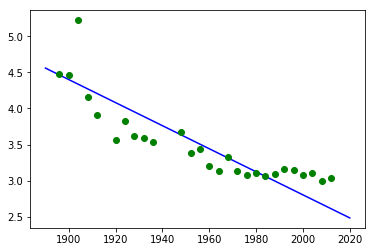

In [19]:
f_test = m*x_test + c
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'go')

#### Question 3 Answer Here

Since we are alternating between the values of m and c as per the question, we are getting so many iterations.

## Multiple Input Solution with Linear Algebra

You've now seen how slow it can be to perform a coordinate ascent on a system. Another approach to solving the system (which is not always possible, particularly in *non-linear* systems) is to go direct to the minimum. To do this we need to introduce *linear algebra*. We will represent all our errors and functions in the form of linear algebra. 

As we mentioned above, linear algebra is just a shorthand for performing lots of multiplications and additions simultaneously. What does it have to do with our system then? Well the first thing to note is that the linear function we were trying to fit has the following form:
$$
f(x) = mx + c
$$
the classical form for a straight line. From a linear algebraic perspective we are looking for multiplications and additions. We are also looking to separate our parameters from our data. The data is the *givens* remember, in French the word is données literally translated means *givens* that's great, because we don't need to change the data, what we need to change are the parameters (or variables) of the model. In this function the data comes in through $x$, and the parameters are $m$ and $c$. 

What we'd like to create is a vector of parameters and a vector of data. Then we could represent the system with vectors that represent the data, and vectors that represent the parameters. 

We look to turn the multiplications and additions into a linear algebraic form, we have one multiplication ($m\times c$) and one addition ($mx + c$). But we can turn this into a inner product by writing it in the following way,
$$
f(x) = m \times x + c \times 1,
$$
in other words we've extracted the unit value, from the offset, $c$. We can think of this unit value like an extra item of data, because it is always given to us, and it is always set to 1 (unlike regular data, which is likely to vary!). We can therefore write each input data location, $\mathbf{x}$, as a vector
$$
\mathbf{x} = \begin{bmatrix} 1\\ x\end{bmatrix}.
$$

Now we choose to also turn our parameters into a vector. The parameter vector will be defined to contain 
$$
\mathbf{w} = \begin{bmatrix} c \\ m\end{bmatrix}
$$
because if we now take the inner product between these to vectors we recover
$$
\mathbf{x}\cdot\mathbf{w} = 1 \times c + x \times m = mx + c
$$
In `numpy` we can define this vector as follows

In [14]:
# define the vector w
w = np.zeros(shape=(2, 1))
w[0] = m
w[1] = c

This gives us the equivalence between original operation and an operation in vector space. Whilst the notation here isn't a lot shorter, the beauty is that we will be able to add as many features as we like and still keep the same representation. In general, we are now moving to a system where each of our predictions is given by an inner product. When we want to represent a linear product in linear algebra, we tend to do it with the transpose operation, so since we have $\mathbf{a}\cdot\mathbf{b} = \mathbf{a}^\top\mathbf{b}$ we can write
$$
f(\mathbf{x}_i) = \mathbf{x}_i^\top\mathbf{w}.
$$
Where we've assumed that each data point, $\mathbf{x}_i$, is now written by appending a 1 onto the original vector
$$
\mathbf{x}_i = 
\begin{bmatrix} 
1 \\
x_i
\end{bmatrix}
$$

## Design Matrix

We can do this for the entire data set to form a [*design matrix*](http://en.wikipedia.org/wiki/Design_matrix) $\mathbf{X}$,

$$\mathbf{X} = \begin{bmatrix} 
\mathbf{x}_1^\top \\\ 
\mathbf{x}_2^\top \\\ 
\vdots \\\
\mathbf{x}_n^\top
\end{bmatrix} = \begin{bmatrix}
1 & x_1 \\\
1 & x_2 \\\
\vdots & \vdots \\\
1 & x_n 
\end{bmatrix},$$

which in `numpy` can be done with the following commands:

In [15]:
X = np.hstack((np.ones_like(x), x))
print(X)

[[1.000e+00 1.896e+03]
 [1.000e+00 1.900e+03]
 [1.000e+00 1.904e+03]
 [1.000e+00 1.908e+03]
 [1.000e+00 1.912e+03]
 [1.000e+00 1.920e+03]
 [1.000e+00 1.924e+03]
 [1.000e+00 1.928e+03]
 [1.000e+00 1.932e+03]
 [1.000e+00 1.936e+03]
 [1.000e+00 1.948e+03]
 [1.000e+00 1.952e+03]
 [1.000e+00 1.956e+03]
 [1.000e+00 1.960e+03]
 [1.000e+00 1.964e+03]
 [1.000e+00 1.968e+03]
 [1.000e+00 1.972e+03]
 [1.000e+00 1.976e+03]
 [1.000e+00 1.980e+03]
 [1.000e+00 1.984e+03]
 [1.000e+00 1.988e+03]
 [1.000e+00 1.992e+03]
 [1.000e+00 1.996e+03]
 [1.000e+00 2.000e+03]
 [1.000e+00 2.004e+03]
 [1.000e+00 2.008e+03]
 [1.000e+00 2.012e+03]]


### Writing the Objective with Linear Algebra

When we think of the objective function, we can think of it as the errors where the error is defined in a similar way to what it was in Legendre's day $y_i - f(\mathbf{x}_i)$, in statistics these errors are also sometimes called [*residuals*](http://en.wikipedia.org/wiki/Errors_and_residuals_in_statistics). So we can think as the objective and the prediction function as two separate parts, first we have,
$$
E(\mathbf{w}) = \sum_{i=1}^n (y_i - f(\mathbf{x}_i; \mathbf{w}))^2,
$$
where we've made the function $f(\cdot)$'s dependence on the parameters $\mathbf{w}$ explicit in this equation. Then we have the definition of the function itself,
$$
f(\mathbf{x}_i; \mathbf{w}) = \mathbf{x}_i^\top \mathbf{w}.
$$
Let's look again at these two equations and see if we can identify any inner products. The first equation is a sum of squares, which is promising. Any sum of squares can be represented by an inner product,
$$
a = \sum_{i=1}^{k} b^2_i = \mathbf{b}^\top\mathbf{b},
$$
so if we wish to represent $E(\mathbf{w})$ in this way, all we need to do is convert the sum operator to an inner product. We can get a vector from that sum operator by placing both $y_i$ and $f(\mathbf{x}_i; \mathbf{w})$ into vectors, which we do by defining 
$$
\mathbf{y} = \begin{bmatrix}y_1\\y_2\\ \vdots \\ y_n\end{bmatrix}
$$
and defining
$$
\mathbf{f}(\mathbf{X}; \mathbf{w}) = \begin{bmatrix}f(\mathbf{x}_1; \mathbf{w})\\f(\mathbf{x}_2; \mathbf{w})\\ \vdots \\ f(\mathbf{x}_n; \mathbf{w})\end{bmatrix}.
$$
The second of these is actually a vector-valued function. This term may appear intimidating, but the idea is straightforward. A vector valued function is simply a vector whose elements are themselves defined as *functions*, i.e. it is a vector of functions, rather than a vector of scalars. The idea is so straightforward, that we are going to ignore it for the moment, and barely use it in the derivation. But it will reappear later when we introduce *basis functions*. So we will, for the moment, ignore the dependence of $\mathbf{f}$ on $\mathbf{w}$ and $\mathbf{X}$ and simply summarise it by a vector of numbers
$$
\mathbf{f} = \begin{bmatrix}f_1\\f_2\\ \vdots \\ f_n\end{bmatrix}.
$$
This allows us to write our objective in the folowing, linear algebraic form,
$$
E(\mathbf{w}) = (\mathbf{y} - \mathbf{f})^\top(\mathbf{y} - \mathbf{f})
$$
from the rules of inner products.

But what of our matrix $\mathbf{X}$ of input data? At this point, we need to dust off [*matrix-vector multiplication*](http://en.wikipedia.org/wiki/Matrix_multiplication). Matrix multiplication is simply a convenient way of performing many inner products together, and it's exactly what we need to summarise the operation
$$
f_i = \mathbf{x}_i^\top\mathbf{w}.
$$
This operation tells us that each element of the vector $\mathbf{f}$ (our vector valued function) is given by an inner product between $\mathbf{x}_i$ and $\mathbf{w}$. In other words it is a series of inner products. Let's look at the definition of matrix multiplication, it takes the form
$$
\mathbf{c} = \mathbf{B}\mathbf{a}
$$
where $\mathbf{c}$ might be a $k$ dimensional vector (which we can intepret as a $k\times 1$ dimensional matrix), and $\mathbf{B}$ is a $k\times k$ dimensional matrix and $\mathbf{a}$ is a $k$ dimensional vector ($k\times 1$ dimensional matrix). 

The result of this multiplication is of the form
$$
\begin{bmatrix}c_1\\c_2 \\ \vdots \\ a_k\end{bmatrix} = 
\begin{bmatrix} b_{1,1} & b_{1, 2} & \dots & b_{1, k} \\
b_{2, 1} & b_{2, 2} & \dots & b_{2, k} \\
\vdots & \vdots & \ddots & \vdots \\
b_{k, 1} & b_{k, 2} & \dots & b_{k, k} \end{bmatrix} \begin{bmatrix}a_1\\a_2 \\ \vdots\\ c_k\end{bmatrix} = \begin{bmatrix} b_{1, 1}a_1 + b_{1, 2}a_2 + \dots + b_{1, k}a_k\\
b_{2, 1}a_1 + b_{2, 2}a_2 + \dots + b_{2, k}a_k \\ 
\vdots\\ 
b_{k, 1}a_1 + b_{k, 2}a_2 + \dots + b_{k, k}a_k\end{bmatrix}
$$
so we see that each element of the result, $\mathbf{a}$ is simply the inner product between each *row* of $\mathbf{B}$ and the vector $\mathbf{c}$. Because we have defined each element of $\mathbf{f}$ to be given by the inner product between each *row* of the design matrix and the vector $\mathbf{w}$ we now can write the full operation in one matrix multiplication,
$$
\mathbf{f} = \mathbf{X}\mathbf{w}.
$$

In [16]:
f = np.dot(X, w) # np.dot does matrix multiplication in python

Combining this result with our objective function,
$$
E(\mathbf{w}) = (\mathbf{y} - \mathbf{f})^\top(\mathbf{y} - \mathbf{f})
$$
we find we have defined the *model* with two equations. One equation tells us the form of our predictive function and how it depends on its parameters, the other tells us the form of our objective function.

In [17]:
resid = (y-f)
E = np.dot(resid.T, resid) # matrix multiplication on a single vector is equivalent to a dot product.
print("Error function is:", E)

Error function is: [[6.34574157e+13]]


### Assignment Question 4

The prediction for our movie recommender system had the form
$$
f_{i,j} = \mathbf{u}_i^\top \mathbf{v}_j
$$
and the objective function was then
$$
E = \sum_{i,j} s_{i,j}(y_{i,j} - f_{i, j})^2
$$
Try writing this down in matrix and vector form. How many of the terms can you do? For each variable and parameter carefully think about whether it should be represented as a matrix or vector. Do as many of the terms as you can. Use $\LaTeX$ to give your answers and give the *dimensions* of any matrices you create.

*20 marks* 

#### Question 4 Answer

$$
\mathbf{v}_j = \begin{bmatrix} v_{j,1} \\ v_{j,2}\end{bmatrix},
$$
where $v_{j,1}$ represents the $j$th item's location in the East-West direction (or the $x$-axis) and $v_{j,2}$ represents the $j$th item's location in the North-South direction (or the $y$-axis). 
We can represent the $i$th user's location with a vector 
$$
\mathbf{u}_i = \begin{bmatrix} u_{i,1} \\ u_{i,2}\end{bmatrix}.
$$
We can use $y_{i,j}$ to represent user $i$'s affinity for item $j$. 
$$
\mathbf{u}_i^\top= \begin{bmatrix}
u_{i,1} \ u_{i,2}
\end{bmatrix}
$$
The prediction function can be given as,
$$
f_{i,j} =  \begin{bmatrix}
u_{1,i} \ u_{2,i}
\end{bmatrix}\begin{bmatrix} v_{j,1} \\ v_{j,2}\end{bmatrix} = \begin{bmatrix} u_{i,1}v_{j,1} + u_{i,2}v_{j,2} 
\end{bmatrix}
$$


Below is $\mathbf{Y}$ Matrix with the dimension $m \times n$

$$
\mathbf{Y} = \begin{bmatrix} y_{1,1} & y_{1, 2} & \dots & y_{1, m} \\
y_{2, 1} & y_{2, 2} & \dots & y_{2, m} \\
\vdots & \vdots & \ddots & \vdots \\
y_{n, 1} & y_{n, 2} & \dots & y_{n, m} \end{bmatrix}
$$


Below is $\mathbf{S}$ Matrix with the dimension $m \times n$

$$
\mathbf{S} = \begin{bmatrix} s_{1,1} & s_{1, 2} & \dots & s_{1, m} \\
s_{2, 1} & s_{2, 2} & \dots & s_{2, m} \\
\vdots & \vdots & \ddots & \vdots \\
s_{n, 1} & s_{n, 2} & \dots & s_{n, m} \end{bmatrix}
$$


Below is $\mathbf{F}$ Matrix with the dimension $m \times n$

$$
\mathbf{F}=\begin{bmatrix} u_{1, 1}v_{1, 1} + u_{1, 2}v_{1, 2} & u_{1, 1}v_{2, 1} + u_{1, 2}v_{2, 2} & +\dots + &  u_{1, 1}v_{m, 1} + u_{1, 2}v_{m, 2}\\
u_{2, 1}v_{1, 1} + u_{2, 2}v_{1, 2} & u_{2, 1}v_{2, 1} + u_{2, 2}v_{2, 2} & +\dots + &  u_{2, 1}v_{m, 1} + u_{2, 2}v_{m, 2}\\
\vdots & \vdots & \ddots & \vdots \\
u_{n, 1}v_{1, 1} + u_{n, n}v_{1, 2} & u_{n, 1}v_{2, 1} + u_{n, n}v_{m, m} &  +\dots + & u_{n, 1}v_{m, 1} + u_{n, 2}v_{m, 2}\end{bmatrix}
$$


$$
\mathbf{Y-F}=\begin{bmatrix} y_{1,1}-(u_{1, 1}v_{1, 1} + u_{1, 2}v_{1, 2}) & y_{1, 2}-(u_{1, 1}v_{2, 1} + u_{1, 2}v_{2, 2}) & +\dots + &  y_{1, m}-(u_{1, 1}v_{m, 1} + u_{1, 2}v_{m, 2})\\
y_{2, 1}-(u_{2, 1}v_{1, 1} + u_{2, 2}v_{1, 2}) & y_{2, 2}-(u_{2, 1}v_{2, 1} + u_{2, 2}v_{2, 2}) & +\dots + &  y_{2, m}-(u_{2, 1}v_{m, 1} + u_{2, 2}v_{m, 2})\\
\vdots & \vdots & \ddots & \vdots \\
y_{n, 1}-(u_{n, 1}v_{1, 1} + u_{n, n}v_{1, 2}) &y_{n, 2}-(u_{n, 1}v_{2, 1} + u_{n, n}v_{m, m}) &  +\dots + & y_{n, m}-(u_{n, 1}v_{m, 1} + u_{n, 2}v_{m, 2})\end{bmatrix}
$$


Below is $\mathbf{(Y-F)}^\top$ Matrix with the dimension $n \times m$

$$
\mathbf{(Y-F)}^\top=\begin{bmatrix} y_{1,1}-(u_{1, 1}v_{1, 1} + u_{1, 2}v_{1, 2}) & y_{2, 1}-(u_{2, 1}v_{1, 1} + u_{2, 2}v_{1, 2}) & +\dots + &  y_{n, 1}-(u_{n, 1}v_{1, 1} + u_{n, n}v_{1, 2})\\
y_{1, 2}-(u_{1, 1}v_{2, 1} + u_{1, 2}v_{2, 2}) & y_{2, 2}-(u_{2, 1}v_{2, 1} + u_{2, 2}v_{2, 2}) & +\dots + &  y_{n, 2}-(u_{n, 1}v_{2, 1} + u_{n, n}v_{m, m})\\
\vdots & \vdots & \ddots & \vdots \\
y_{1, m}-(u_{1, 1}v_{m, 1} + u_{1, 2}v_{m, 2}) & y_{2, m}-(u_{2, 1}v_{m, 1} + u_{2, 2}v_{m, 2}) &  +\dots + & y_{n, m}-(u_{n, 1}v_{m, 1} + u_{n, 2}v_{m, 2})\end{bmatrix}
$$

So our objective function $E(\mathbf{w}) = (\mathbf{y} - \mathbf{f})^\top(\mathbf{y} - \mathbf{f})$ can be written as:

$$
\begin{bmatrix} y_{1,1}-(u_{1, 1}v_{1, 1} + u_{1, 2}v_{1, 2}) & y_{2, 1}-(u_{2, 1}v_{1, 1} + u_{2, 2}v_{1, 2}) & +\dots + &  y_{n, 1}-(u_{n, 1}v_{1, 1} + u_{n, n}v_{1, 2})\\
y_{1, 2}-(u_{1, 1}v_{2, 1} + u_{1, 2}v_{2, 2}) & y_{2, 2}-(u_{2, 1}v_{2, 1} + u_{2, 2}v_{2, 2}) & +\dots + &  y_{n, 2}-(u_{n, 1}v_{2, 1} + u_{n, n}v_{m, m})\\
\vdots & \vdots & \ddots & \vdots \\
y_{1, m}-(u_{1, 1}v_{m, 1} + u_{1, 2}v_{m, 2}) &  y_{2, m}-(u_{2, 1}v_{m, 1} + u_{2, 2}v_{m, 2}) &  +\dots + & y_{n, m}-(u_{n, 1}v_{m, 1} + u_{n, 2}v_{m, 2})\end{bmatrix} \times \begin{bmatrix} y_{1,1}-(u_{1, 1}v_{1, 1} + u_{1, 2}v_{1, 2}) & y_{1, 2}-(u_{1, 1}v_{2, 1} + u_{1, 2}v_{2, 2}) & +\dots + &  y_{1, m}-(u_{1, 1}v_{m, 1} + u_{1, 2}v_{m, 2})\\
y_{2, 1}-(u_{2, 1}v_{1, 1} + u_{2, 2}v_{1, 2}) & y_{2, 2}-(u_{2, 1}v_{2, 1} + u_{2, 2}v_{2, 2}) & +\dots + &  y_{2, m}-(u_{2, 1}v_{m, 1} + u_{2, 2}v_{m, 2})\\
\vdots & \vdots & \ddots & \vdots \\
y_{n, 1}-(u_{n, 1}v_{1, 1} + u_{n, n}v_{1, 2}) &y_{n, 2}-(u_{n, 1}v_{2, 1} + u_{n, n}v_{m, m}) &  +\dots + & y_{n, m}-(u_{n, 1}v_{m, 1} + u_{n, 2}v_{m, 2})\end{bmatrix}
$$

We will multiply the $\mathbf{S}$ Matrix with the product of the above to matrices to get the result.

## Objective Optimisation

Our *model* has now been defined with two equations, the prediction function and the objective function. Next we will use multivariate calculus to define an *algorithm* to fit the model. The separation between model and algorithm is important and is often overlooked. Our model contains a function that shows how it will be used for prediction, and a function that describes the objective function we need to optimise to obtain a good set of parameters. 

The linear regression model we have described is still the same as the one we fitted above with a coordinate ascent algorithm. We have only played with the notation to obtain the same model in a matrix and vector notation. However, we will now fit this model with a different algorithm, one that is much faster. It is such a widely used algorithm that from the end user's perspective it doesn't even look like an algorithm, it just appears to be a single operation (or function). However, underneath the computer calls an algorithm to find the solution. Further, the algorithm we obtain is very widely used, and because of this it turns out to be highly optimised.

Once again we are going to try and find the stationary points of our objective by finding the *stationary points*. However, the stationary points of a multivariate function, are a little bit more complext to find. Once again we need to find the point at which the derivative is zero, but now we need to use  *multivariate calculus* to find it. This involves learning a few additional rules of differentiation (that allow you to do the derivatives of a function with respect to  vector), but in the end it makes things quite a bit easier. We define vectorial derivatives as follows,
$$
\frac{\text{d}E(\mathbf{w})}{\text{d}\mathbf{w}} = \begin{bmatrix}\frac{\partial E(\mathbf{w})}{\partial w_1}\\\frac{\partial E(\mathbf{w})}{\partial w_2}\end{bmatrix}.
$$
where $\frac{\partial E(\mathbf{w})}{\partial w_1}$ is the [partial derivative](http://en.wikipedia.org/wiki/Partial_derivative) of the error function with respect to $w_1$.

Differentiation through multiplications and additions is relatively straightforward, and since linear algebra is just multiplication and addition, then its rules of diffentiation are quite straightforward too, but slightly more complex than regular derivatives. 

### Matrix Differentiation

We will need two rules of differentiation. The first is diffentiation of an inner product. By remebering that the inner product is made up of multiplication and addition, we can hope that its derivative is quite straightforward, and so it proves to be. We can start by thinking about the definition of the inner product,
$$
\mathbf{a}^\top\mathbf{z} = \sum_{i} a_i z_i,
$$
which if we were to take the derivative with respect to $z_k$ would simply return the gradient of the one term in the sum for which the derivative was non zero, that of $a_k$, so we know that 
$$
\frac{\text{d}}{\text{d}z_k} \mathbf{a}^\top \mathbf{z} = a_k
$$
and by our definition of multivariate derivatives we can simply stack all the partial derivatives of this form in a vector to obtain the result that
$$
\frac{\text{d}}{\text{d}\mathbf{z}} \mathbf{a}^\top \mathbf{z} = \mathbf{a}.
$$
The second rule that's required is differentiation of a 'matrix quadratic'. A scalar quadratic in $z$ with coefficient $c$ has the form $cz^2$. If $\mathbf{z}$ is a $k\times 1$ vector and $\mathbf{C}$ is a $k \times k$ *matrix* of coefficients then the matrix quadratic form is written as $\mathbf{z}^\top \mathbf{C}\mathbf{z}$, which is itself a *scalar* quantity, but it is a function of a *vector*. 

#### Matching Dimensions in Matrix Multiplications

There's a trick for telling that it's a scalar result. When you are doing maths with matrices, it's always worth pausing to perform a quick sanity check on the dimensions. Matrix multplication only works when the dimensions match. To be precise, the 'inner' dimension of the matrix must match. What is the inner dimension. If we multiply two matrices $\mathbf{A}$ and $\mathbf{B}$, the first of which has $k$ rows and $\ell$ columns and the second of which has $p$ rows and $q$ columns, then we can check whether the multiplication works by writing the dimensionalities next to each other,
$$
\mathbf{A} \mathbf{B} \rightarrow (k \times \underbrace{\ell)(p}_\text{inner dimensions} \times q) \rightarrow (k\times q).
$$
The inner dimensions are the two inside dimensions, $\ell$ and $p$. The multiplication will only work if $\ell=p$. The result of the multiplication will then be a $k\times q$ matrix: this dimensionality comes from the 'outer dimensions'. Note that matrix multiplication is not [*commutative*](http://en.wikipedia.org/wiki/Commutative_property). And if you change the order of the multiplication, 
$$
\mathbf{B} \mathbf{A} \rightarrow (\ell \times \underbrace{k)(q}_\text{inner dimensions} \times p) \rightarrow (\ell \times p).
$$
firstly it may no longer even work, because now the condition is that $k=q$, and secondly the result could be of a different dimensionality. An exception is if the matrices are square matrices (e.g. same number of rows as columns) and they are both *symmetric*. A symmetric matrix is one for which $\mathbf{A}=\mathbf{A}^\top$, or equivalently, $a_{i,j} = a_{j,i}$ for all $i$ and $j$.  

You will need to get used to working with matrices and vectors applying and developing new machine learning techniques. You should have come across them before, but you may not have used them as extensively as we will now do in this course. You should get used to using this trick to check your work and ensure you know what the dimension of an output matrix should be. For our matrix quadratic form, it turns out that we can see it as a special type of inner product.
$$
\mathbf{z}^\top\mathbf{C}\mathbf{z} \rightarrow (1\times \underbrace{k) (k}_\text{inner dimensions}\times k) (k\times 1) \rightarrow \mathbf{b}^\top\mathbf{z}
$$
where $\mathbf{b} = \mathbf{C}\mathbf{z}$ so therefore the result is a scalar,
$$
\mathbf{b}^\top\mathbf{z} \rightarrow (1\times \underbrace{k) (k}_\text{inner dimensions}\times 1) \rightarrow (1\times 1)
$$
where a $(1\times 1)$ matrix is recognised as a scalar.

This implies that we should be able to differentiate this form, and indeed the rule for its differentiation is slightly more complex than the inner product, but still quite simple,
$$
\frac{\text{d}}{\text{d}\mathbf{z}} \mathbf{z}^\top\mathbf{C}\mathbf{z}= \mathbf{C}\mathbf{z} + \mathbf{C}^\top \mathbf{z}.
$$
Note that in the special case where $\mathbf{C}$ is symmetric then we have $\mathbf{C} = \mathbf{C}^\top$ and the derivative simplifies to 
$$
\frac{\text{d}}{\text{d}\mathbf{z}} \mathbf{z}^\top\mathbf{C}\mathbf{z}= 2\mathbf{C}\mathbf{z}.
$$
### Differentiating the Objective

First, we need to compute the full objective by substituting our prediction function into the objective function to obtain the objective in terms of $\mathbf{w}$. Doing this we obtain
$$
E(\mathbf{w})= (\mathbf{y} - \mathbf{X}\mathbf{w})^\top (\mathbf{y} - \mathbf{X}\mathbf{w}).
$$
We now need to differentiate this *quadratic form* to find the minimum. We differentiate with respect to the *vector* $\mathbf{w}$. But before we do that, we'll expand the brackets in the quadratic form to obtain a series of scalar terms. The rules for bracket expansion across the vectors are similar to those for the scalar system giving,
$$
(\mathbf{a} - \mathbf{b})^\top (\mathbf{c} - \mathbf{d}) = \mathbf{a}^\top \mathbf{c} - \mathbf{a}^\top \mathbf{d} - \mathbf{b}^\top \mathbf{c} + \mathbf{b}^\top \mathbf{d}
$$
which substituting for $\mathbf{a} = \mathbf{c} = \mathbf{y}$ and $\mathbf{b}=\mathbf{d} = \mathbf{X}\mathbf{w}$ gives
$$
E(\mathbf{w})= \mathbf{y}^\top\mathbf{y} - 2\mathbf{y}^\top\mathbf{X}\mathbf{w} + \mathbf{w}^\top\mathbf{X}^\top\mathbf{X}\mathbf{w}
$$
where we used the fact that $\mathbf{y}^\top\mathbf{X}\mathbf{w}= \mathbf{w}^\top\mathbf{X}^\top\mathbf{y}$. Now we can use our rules of differentiation to compute the derivative of this form, which is,
$$
\frac{\text{d}}{\text{d}\mathbf{w}}E(\mathbf{w})=- 2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top\mathbf{X}\mathbf{w},
$$
where we have exploited the fact that $\mathbf{X}^\top\mathbf{X}$ is symmetric to obtain this result.

### Assignment Question 5

Use the equivalence between our vector and our matrix formulations of linear regression, alongside our definition of vector derivates, to match the gradients we've computed directly for $\frac{\text{d}E(c, m)}{\text{d}c}$ and $\frac{\text{d}E(c, m)}{\text{d}m}$ to those for $\frac{\text{d}E(\mathbf{w})}{\text{d}\mathbf{w}}$.

*20 marks*

#### Question 5 Answer

We have,
$$
\frac{\text{d}E(\mathbf{w})}{\text{d}m} = - 2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top\mathbf{X}\mathbf{w}
$$

$$or,
\frac{\text{d}E(\mathbf{w})}{\text{d}m} =-  2(\mathbf{X}^\top \mathbf{y} - \mathbf{X}^\top\mathbf{X}\mathbf{w})
$$


Now, from the Design Matrix we have,


$$
\mathbf{X} = \begin{bmatrix}
1 & x_1 \\\
1 & x_2 \\\
1 & x_3 \\\
\vdots & \vdots \\\
1 & x_n 
\end{bmatrix}
$$

Hence, we can say,

$$
\mathbf{X}^\top = \begin{bmatrix}
1 & 1 & 1 & \dots & 1\\\
x_1 & x_2 & x_3 & \dots & x_n \\\
\end{bmatrix}
$$

Again, from the previous equations we have the following:


$$
\mathbf{y} = \begin{bmatrix}y_1\\y_2\\y_3\\ \vdots \\ y_n\end{bmatrix}
$$



$$
\mathbf{w} = \begin{bmatrix} c \\ m\end{bmatrix}
$$


We will now expand the equation: $\mathbf{X}^\top \mathbf{y} - \mathbf{X}^\top\mathbf{X}\mathbf{w}$ in Matrix form.


$$
\mathbf{X}^\top \mathbf{y} - \mathbf{X}^\top\mathbf{X}\mathbf{w} =  \begin{bmatrix}
1 & 1 & 1 & \dots & 1\\\
x_1 & x_2 & x_3 & \dots & x_n \\\
\end{bmatrix}\begin{bmatrix}y_1\\y_2\\y_3 \vdots \ y_n\end{bmatrix} - \begin{bmatrix}
1 & 1 & 1 & \dots & 1\\\
x_1 & x_2 & x_3 & \dots & x_n \\\
\end{bmatrix}\begin{bmatrix}
1 & x_1 \\\
1 & x_2 \\\
1 & x_3 \\\
\vdots & \vdots \\\
1 & x_n 
\end{bmatrix}\begin{bmatrix} c \\ m\end{bmatrix}
$$
$$
\mathbf{X}^\top \mathbf{y} - \mathbf{X}^\top\mathbf{X}\mathbf{w} = 
\begin{bmatrix}y_1+y_2+y_3+y_4+ & \dots \ +y_n\\
x_1y_1+x_2y_2+x_3y_3+ & \dots +x_ny_n\\\
\end{bmatrix} - \begin{bmatrix}
1 & 1 & 1 & \dots & 1\\\
x_1 & x_2 & x_3 & \dots & x_n \\\
\end{bmatrix}\begin{bmatrix}
c+mx_1 \\\
c+mx_2 \\\
c+mx_3 \\\
\vdots\\\
c+mx_n\end{bmatrix}
$$
$$
\mathbf{X}^\top \mathbf{y} - \mathbf{X}^\top\mathbf{X}\mathbf{w} =
\begin{bmatrix}y_1+y_2+y_3+y_4+ & \dots \ +y_n\\
x_1y_1+x_2y_2+x_3y_3+ & \dots +x_ny_n\\\
\end{bmatrix} - \begin{bmatrix}
c+mx_1 + c+mx_2 + c+mx_3 +     \ \  \ \ \ \ \dots \ \ \ \ \ \ \ + c+mx_n\\\
x(c+mx_1) + x(c+mx_2) + x(c+mx_3) + \dots + x(c+mx_n)\\\
\end{bmatrix}
$$
$$
\mathbf{X}^\top \mathbf{y} - \mathbf{X}^\top\mathbf{X}\mathbf{w} =
\begin{bmatrix}y_1-(c+mx_1)+y_2-(c+mx_2)+y_3-(c+mx_3)+ \  \dots \ +y_n-(c+mx_n)\\
x_1y_1-x_1(c+mx_1)+x_2y_2-x_2(c+mx_2)+x_3y_3-x_3(c+mx_3)+  \dots  +x_ny_n-x_n(c+mx_n)\\\
\end{bmatrix}
$$
$$
\therefore  \frac{\text{d}}{\text{d}\mathbf{w}}E(\mathbf{w}) = -2\begin{bmatrix}(y_1-c-mx_1)+(y_2-c-mx_2)+(y_3-c-mx_3)+  \ \ \ \ \dots\ \ \ \ \ \ \ \ +(y_n-c-mx_n)\\
x_1(y_1-c-mx_1)+x_2(y_2-c-mx_2)+x_3(y_3-c-mx_3)+ \ \dots \ +x_n(y_n-c-mx_n)\\\
\end{bmatrix}
$$
$$
\therefore  \frac{\text{d}}{\text{d}\mathbf{w}}E(\mathbf{w}) = -2\begin{bmatrix}(y_1-mx_1-c)+(y_2-mx_2-c)+(y_3-mx_3-c)+  \ \ \ \ \dots\ \ \ \ \ \ \ \ +(y_n-mx_n-c)\\
x_1(y_1-mx_1-c)+x_2(y_2-mx_2-c)+x_3(y_3-mx_3-c)+ \ \dots \ +x_n(y_n-mx_n-c)\\\
\end{bmatrix}
$$
$$
\therefore  \frac{\text{d}E(\mathbf{w})}{\text{d}m} = \begin{bmatrix}-\sum_{i=1}^n 2(y_i-mx_i-c) \\
-\sum_{i=1}^n 2x_i(y_i-mx_i-c)\end{bmatrix}
$$


Hence, the equivalence can be given as:


$$
\frac{\text{d}E(\mathbf{w})}{\text{d}m} = \begin{bmatrix}\frac{\text{d}E(c,m)}{\text{d}c} \\
\frac{\text{d}E(c,m)}{\text{d}m}\end{bmatrix}
$$

## Update Equation for Global Optimum

Once again, we need to find the minimum of our objective function. Using our likelihood for multiple input regression we can now minimize for our parameter vector $\mathbf{w}$. Firstly, just as in the single input case, we seek stationary points by finding parameter vectors that solve for when the gradients are zero,
$$
\mathbf{0}=- 2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top\mathbf{X}\mathbf{w},
$$
where $\mathbf{0}$ is a *vector* of zeros. Rearranging this equation we find the solution to be
$$
\mathbf{w} = \left[\mathbf{X}^\top \mathbf{X}\right]^{-1} \mathbf{X}^\top \mathbf{y}
$$ 
where $\mathbf{A}^{-1}$ denotes [*matrix inverse*](http://en.wikipedia.org/wiki/Invertible_matrix).

### Solving the Multivariate System

The solution for $\mathbf{w}$ is given in terms of a matrix inverse, but computation of a matrix inverse requires, in itself, an algorithm to resolve it. You'll know this if you had to invert, by hand, a $3\times 3$ matrix in high school. From a numerical stability perspective, it is also best not to compute the matrix inverse directly, but rather to ask the computer to *solve* the  system of linear equations given by
$$\mathbf{X}^\top\mathbf{X} \mathbf{w} = \mathbf{X}^\top\mathbf{y}$$
for $\mathbf{w}$. This can be done in `numpy` using the command

In [18]:
np.linalg.solve?

so we can obtain the solution using

In [19]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print(w)

[[ 2.88952457e+01]
 [-1.29806477e-02]]


We can map it back to the liner regression and plot the fit as follows

[-0.01298065]
[28.89524574]


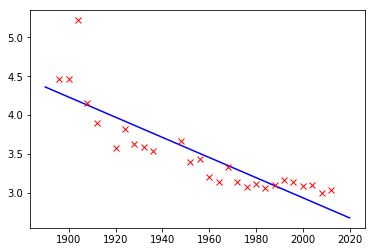

In [20]:
m = w[1]; c=w[0]
f_test = m*x_test + c
print(m)
print(c)
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

## Multivariate Linear Regression

A major advantage of the new system is that we can build a linear regression on a multivariate system. The matrix calculus didn't specify what the length of the vector $\mathbf{x}$ should be, or equivalently the size of the design matrix. 

### Movie Body Count Data

Let's load back in the movie body count data.

In [21]:
data = pods.datasets.movie_body_count()
movies = data['Y']

Acquiring resource: movie_body_count

Details of data: 
Data scraped from www.MovieBodyCounts.com and www.imdb.com using scripts provided on a github repository (in both Python and R) at https://github.com/morpionZ/R-vs-Python/tree/master/Deadliest%20movies%20scrape/code. This script pulls down the scraped data.

Please cite:
Simon Garnier and Randy Olson, Blog Post: R vs Python Round 2, February 2nd 2014 (http://www.theswarmlab.com/r-vs-python-round-2-22/)

After downloading the data will take up 536272 bytes of space.

Data will be stored in C:\Users\hp/ods_data_cache/movie_body_count.

Do you wish to proceed with the download? [yes/no]
yes
[==============================]   0.366/0.366MB                                                                                                                                                                                                                                                                                                             

Let's remind ourselves of the features we've been provided with.

In [22]:
print(', '.join(movies.columns))

Film, Year, Body_Count, MPAA_Rating, Genre, Director, Actors, Length_Minutes, IMDB_Rating


Now we will build a design matrix based on the numeric features: year, Body_Count, Length_Minutes in an effort to predict the rating. We build the design matrix as follows:

## Relation to Single Input System

Bias as an additional feature.

In [23]:
select_features = ['Year', 'Body_Count', 'Length_Minutes']
X = movies.loc[:, select_features]
X['Eins'] = 1 # add a column for the offset
y = movies[['IMDB_Rating']]

Now let's perform a linear regression. But this time, we will create a pandas data frame for the result so we can store it in a form that we can visualise easily.

In [24]:
import pandas as pd
w = pd.DataFrame(data=np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y)),  # solve linear regression here
                 index = X.columns,  # columns of X become rows of w
                 columns=['regression_coefficient']) # the column of X is the value of regression coefficient
w

,regression_coefficient
Year,-0.016280
Body_Count,-0.000995
Length_Minutes,0.025386
Eins,36.508363


We can check the residuals to see how good our estimates are

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012355114208>]],
      dtype=object)

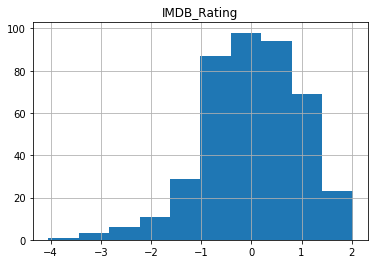

In [25]:
(y - np.dot(X, w)).hist()

Which shows our model *hasn't* yet done a great job of representation, because the spread of values is large. We can check what the rating is dominated by in terms of regression coefficients.

In [26]:
w

,regression_coefficient
Year,-0.016280
Body_Count,-0.000995
Length_Minutes,0.025386
Eins,36.508363


Although we have to be a little careful about interpretation because our input values live on different scales, however it looks like we are dominated by the bias, with a small negative effect for later films (but bear in mind the years are large, so this effect is probably larger than it looks) and a positive effect for length. So it looks like long earlier films generally do better, but the residuals are so high that we probably haven't modelled the system very well.

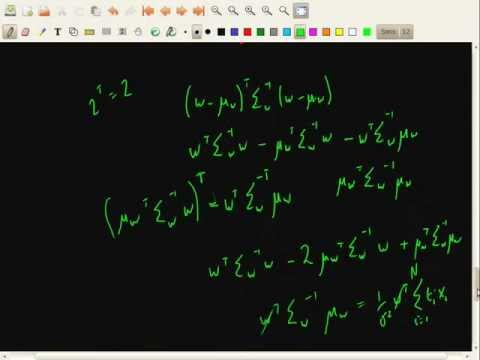

In [27]:
from IPython.display import YouTubeVideo
YouTubeVideo('ui-uNlFHoms')

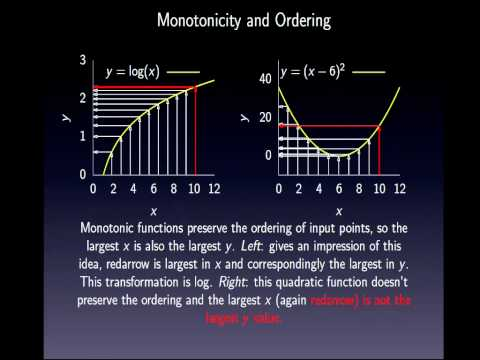

In [28]:
from IPython.display import YouTubeVideo
YouTubeVideo('78YNphT90-k')

## Solution with QR Decomposition

Performing a solve instead of a matrix inverse is the more numerically stable approach, but we can do even better. A [QR-decomposition](http://en.wikipedia.org/wiki/QR_decomposition) of a matrix factorises it into a matrix which is an orthogonal matrix $\mathbf{Q}$, so that $\mathbf{Q}^\top \mathbf{Q} = \mathbf{I}$. And a matrix which is upper triangular, $\mathbf{R}$. 
$$
\mathbf{X}^\top \mathbf{X} \boldsymbol{\beta} = \mathbf{X}^\top \mathbf{y}
$$
$$
(\mathbf{Q}\mathbf{R})^\top (\mathbf{Q}\mathbf{R})\boldsymbol{\beta} = (\mathbf{Q}\mathbf{R})^\top \mathbf{y}
$$
$$
\mathbf{R}^\top (\mathbf{Q}^\top \mathbf{Q}) \mathbf{R} \boldsymbol{\beta} = \mathbf{R}^\top \mathbf{Q}^\top \mathbf{y}
$$
$$
\mathbf{R}^\top \mathbf{R} \boldsymbol{\beta} = \mathbf{R}^\top \mathbf{Q}^\top \mathbf{y}
$$
$$
\mathbf{R} \boldsymbol{\beta} = \mathbf{Q}^\top \mathbf{y}
$$
This is a more numerically stable solution because it removes the need to compute $\mathbf{X}^\top\mathbf{X}$ as an intermediate. Computing $\mathbf{X}^\top\mathbf{X}$ is a bad idea because it involves squaring all the elements of $\mathbf{X}$ and thereby potentially reducing the numerical precision with which we can represent the solution. Operating on $\mathbf{X}$ directly preserves the numerical precision of the model.

This can be more particularly seen when we begin to work with *basis functions* in the next week. Some systems that can be resolved with the QR decomposition can not be resolved by using solve directly.

In [29]:
import scipy as sp
Q, R = np.linalg.qr(X)
w = sp.linalg.solve_triangular(R, np.dot(Q.T, y)) 
w = pd.DataFrame(w, index=X.columns)
w

,0
Year,-0.016280
Body_Count,-0.000995
Length_Minutes,0.025386
Eins,36.508363
